Author: Muhammad Rafif Dwidayatama (rafifdwida@gmail.com) - August, 2023..

# Business Understanding

## Pemahaman Bisnis

Ketika perusahaan pemberi pinjaman menerima aplikasi pinjaman, perusahaan harus memutuskan apakah akan menyetujui atau menolak aplikasi pinjaman berdasarkan profil pemohon (setiap keputusan yang dibuat memiliki risiko baik atau buruk).
- Jika pemohon kemungkinan besar akan melunasi pinjamannya, maka menolak permohonannya akan menjadi kerugian bisnis bagi perusahaan. Situasi ini disebut risiko yang baik.
- Jika pemohon tidak mungkin membayar kembali pinjaman, maka menyetujui permohonan mereka akan menjadi kerugian finansial bagi perusahaan. Situasi ini disebut risiko buruk.

Data tersebut berisi informasi tentang pinjaman masa lalu pemohon dan apakah mereka disebut sebagai risiko yang baik atau tidak. Ketika pemohon mengajukan pinjaman, ada dua jenis risiko, yaitu:

1. Risiko baik terdiri dari Fully Paid, Current, dan In Grace Period. Pelamar dengan label ini lebih mungkin mendapatkan pinjaman mereka disetujui di masa depan.
2. Risiko Buruk terdiri dari Late, Default, dan Charged Off. Pelamar dengan label ini kemungkinan besar tidak akan disetujui pinjamannya di masa mendatang.

## Tujuan Bisnis

**Pernyataan masalah**:

Meminjamkan pinjaman kepada pelamar yang 'berisiko buruk' adalah sumber kerugian finansial terbesar. Kerugian kredit adalah jumlah uang yang hilang oleh pemberi pinjaman ketika pemohon menolak untuk membayar atau melarikan diri dengan pinjaman yang belom terbayar

**Tujuan**:

1. Identifikasi pola yang menunjukkan jika seseorang tidak mungkin membayar kembali pinjaman atau dicap sebagai risiko buruk sehingga dapat digunakan untuk mengambil tindakan seperti menolak pinjaman, mengurangi jumlah pinjaman, meminjamkan dengan tingkat bunga yang lebih tinggi, dll .
3. Menerapkan algoritma pembelajaran mesin untuk membangun model prediksi sehingga perusahaan dapat secara otomatis memprediksi apakah aplikasi pinjaman yang diajukan oleh pemohon akan dilabeli sebagai risiko buruk atau tidak. Dengan ini, perusahaan dapat mengambil keputusan untuk menyetujui atau menolak permohonan pinjaman.

# Data Preparation

## Import Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [3]:
df = pd.read_csv ('loan_data_2007_2014.csv', sep=',')

# Data Understanding

In [4]:
df.shape

(466285, 75)

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.000000,36 months,10.650000,162.870000,B,B2,NaN,10+ years,RENT,24000.000000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650000,0.000000,Jan-85,1.000000,NaN,NaN,3.000000,0.000000,13648,83.700000,9.000000,f,0.000000,0.000000,5861.071414,5831.780000,5000.000000,861.070000,0.000000,0.000000,0.000000,Jan-15,171.620000,NaN,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.000000,60 months,15.270000,59.830000,C,C4,Ryder,< 1 year,RENT,30000.000000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000000,0.000000,Apr-99,5.000000,NaN,NaN,3.000000,0.000000,1687,9.400000,4.000000,f,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,Apr-13,119.660000,NaN,Sep-13,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.000000,36 months,15.960000,84.330000,C,C5,NaN,10+ years,RENT,12252.000000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720000,0.000000,Nov-01,2.000000,NaN,NaN,2.000000,0.000000,2956,98.500000,10.000000,f,0.000000,0.000000,3003.653644,3003.650000,2400.000000,603.650000,0.000000,0.000000,0.000000,Jun-14,649.910000,NaN,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.000000,36 months,13.490000,339.310000,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000000,0.000000,Feb-96,1.000000,35.000000,NaN,10.000000,0.000000,5598,21.000000,37.000000,f,0.000000,0.000000,12226.302210,12226.300000,10000.000000,2209.330000,16.970000,0.000000,0.000000,Jan-15,357.480000,NaN,Jan-15,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.000000,60 months,12.690000,67.790000,B,B5,University Medical Group,1 year,RENT,80000.000000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940000,0.000000,Jan-96,0.000000,38.000000,NaN,15.000000,0.000000,27783,53.900000,38.000000,f,766.900000,766.900000,3242.170000,3242.170000,2233.100000,1009.070000,0.000000,0.000000,0.000000,Jan-16,67.790000,Feb-16,Jan-16,0.000000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preview data tiap kolom

In [6]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f'Nilai unik dalam kolom {col}: {unique_vals}')

Nilai unik dalam kolom Unnamed: 0: [     0      1      2 ... 466282 466283 466284]
Nilai unik dalam kolom id: [1077501 1077430 1077175 ... 9584776 9604874 9199665]
Nilai unik dalam kolom member_id: [ 1296599  1314167  1313524 ... 11436914 11457002 11061576]
Nilai unik dalam kolom loan_amnt: [ 5000  2500  2400 ... 33675 27775 33175]
Nilai unik dalam kolom funded_amnt: [ 5000  2500  2400 ... 27775 33175 31725]
Nilai unik dalam kolom funded_amnt_inv: [ 4975.  2500.  2400. ... 30425. 33125. 33625.]
Nilai unik dalam kolom term: [' 36 months' ' 60 months']
Nilai unik dalam kolom int_rate: [10.65 15.27 15.96 13.49 12.69  7.9  18.64 21.28 14.65  9.91 16.29  6.03
 11.71 12.42 14.27 16.77  7.51  8.9  18.25  6.62 19.91 17.27 17.58 21.67
 19.42 22.06 20.89 20.3  23.91 19.03 23.52 23.13 22.74 22.35 24.11  6.
 22.11  7.49 11.99  5.99 10.99  9.99 18.79 11.49  8.49 15.99 16.49  6.99
 12.99 15.23 14.79  5.42 10.59 17.49 15.62 21.36 19.29 13.99 18.39 16.89
 17.99 20.62 20.99 22.85 19.69 20.25 23.22 21.7

Kolom Loan_status berisi status pinjaman dari pemohon, yaitu Current, Fully Paid, Charged Off, Late (16-30 days), Late (31-120 days), In Grace Period, and Default. Kolom ini akan menjadi fitur target untuk analisis prediksi resiko kredit

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

`issue_d`, `earliest_cr_line`, `last_pymnt_d`, `next_pymnt_d`, dan
`last_credit_pull_d` berisi tentang tanggal namun berbentuk object,
jadi akan diubah tipe datanya ke datetime di

In [4]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [5]:
# convert string to datetime
from datetime import datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: date_time(x))
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y') 
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'],format='%b-%y') 
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df[['earliest_cr_line', 'issue_d', 'next_pymnt_d', 'last_pymnt_d', 'last_credit_pull_d']].head()

,earliest_cr_line,issue_d,next_pymnt_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,NaT,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,NaT,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,NaT,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,NaT,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-02-01,2016-01-01,2016-01-01


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loan_amnt                    466285 non-null  int64         
 1   funded_amnt                  466285 non-null  int64         
 2   funded_amnt_inv              466285 non-null  float64       
 3   term                         466285 non-null  object        
 4   int_rate                     466285 non-null  float64       
 5   installment                  466285 non-null  float64       
 6   grade                        466285 non-null  object        
 7   sub_grade                    466285 non-null  object        
 8   emp_title                    438697 non-null  object        
 9   emp_length                   445277 non-null  object        
 10  home_ownership               466285 non-null  object        
 11  annual_inc                

#### Features Description

| Features | Description |
| :--- | :--- |
| addr_state |	Negara yang disediakan oleh pemohon dalam aplikasi pinjaman|
| annual_inc |	Penghasilan tahunan yang dilaporkan sendiri yang diberikan oleh pemohon selama pendaftaran|
| annual_inc_joint | Pendapatan tahunan gabungan yang dilaporkan sendiri yang diberikan oleh pelamar bersama selama pendaftaran||
| application_type | Menunjukkan apakah pinjaman tersebut merupakan aplikasi individu atau aplikasi bersama dengan dua pemohon bersama||
| collection_recovery_fee |	Pasca membebankan biaya pengumpulan ||
| collections_12_mths_ex_med |	Jumlah koleksi dalam 12 bulan tidak termasuk koleksi medis||
| delinq_2yrs | Jumlah 30+ hari insiden tunggakan dalam file kredit pemohon selama 2 tahun terakhir |
| desc | Uraian pinjaman yang diberikan oleh pemohon||
| dti |	Rasio yang dihitung dengan menggunakan total pembayaran utang bulanan pemohon terhadap total kewajiban utang, tidak termasuk hipotek dan pinjaman LC yang diminta, dibagi dengan pendapatan bulanan yang dilaporkan sendiri oleh pemohon|
| dti_joint | Rasio yang dihitung dengan menggunakan total pembayaran bulanan co-applicant pada total kewajiban utang, tidak termasuk hipotek dan pinjaman LC yang diminta, dibagi dengan gabungan pendapatan bulanan yang dilaporkan sendiri oleh co-applicant|
| earliest_cr_line | Bulan batas kredit paling awal yang dilaporkan pemohon dibuka|
| emp_length |	Lama kerja dalam tahun. Nilai yang mungkin adalah antara 0 dan 10 di mana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih|
| emp_title | Judul pekerjaan yang diberikan oleh pemohon saat mengajukan pinjaman |
| fico_range_high |	Kisaran batas atas FICO pemohon pada pinjaman originasi milik |
| fico_range_low |	Kisaran batas bawah FICO pemohon pada pinjaman originasi milik |
| funded_amnt |	Jumlah total yang berkomitmen untuk pinjaman tersebut pada saat itu|
| rec | Jumlah total yang dilakukan oleh investor untuk pinjaman tersebut pada saat itu |
| grade | LC menetapkan peringkat pinjaman |
| home_ownership |	Status kepemilikan rumah yang diberikan oleh pemohon pada saat pendaftaran. Nilai kami adalah: SEWA, SENDIRI, MORTGAGE, LAINNYA |
| id |	ID LC unik yang diberikan untuk daftar pinjaman |
| initial_list_status |	Status pencatatan awal pinjaman. Nilai yang mungkin adalah – W, F |
| inq_last_6mths |	Jumlah pertanyaan dalam 6 bulan terakhir (tidak termasuk pertanyaan mobil dan hipotek) |
| installment |	Pembayaran bulanan yang harus dibayar oleh pemohon jika pinjaman berasal |
| int_rate | Suku bunga pinjaman |
| is_inc_v | Menandakan jika pendapatan diverifikasi oleh LC, tidak diverifikasi, atau jika sumber pendapatan diverifikasi |
| issue_d |	Bulan pinjaman didanai |
| last_credit_pull_d |	Bulan terakhir LC menarik kredit untuk pinjaman ini |
| last_fico_range_high | Kisaran batas atas yang ditarik oleh FICO terakhir pemohon milik |
| last_fico_range_low |	Kisaran batas bawah yang ditarik oleh FICO terakhir pemohon milik |
| last_pymnt_amnt | Jumlah total pembayaran terakhir yang diterima |
| last_pymnt_d | Pembayaran bulan lalu telah diterima |
| loan_amnt |	Pembayaran bulan lalu telah diterima |
| loan_status |	Status pinjaman saat ini |
| member_id |	LC unik yang diberikan Id untuk anggota pemohon |
| mths_since_last_delinq |	Jumlah bulan sejak tunggakan terakhir pemohon |
| mths_since_last_major_derog |	Bulan sejak peringkat 90 hari terakhir atau lebih buruk |
| mths_since_last_record |	Jumlah bulan sejak catatan publik terakhir |
| next_pymnt_d |	Tanggal pembayaran terjadwal berikutnya |
| open_acc |	Sisa pokok terhutang untuk jumlah total yang didanai |
| out_prncp |	Jumlah jalur kredit terbuka dalam file kredit pemohon |
| out_prncp_inv |	Sisa pokok pinjaman untuk sebagian dari jumlah total yang didanai oleh investor |
| policy_code | policy_code=1 tersedia untuk umum, produk baru tidak tersedia untuk umum policy_code=2 |
| pub_rec | Jumlah catatan publik yang merendahkan |
| purpose |	Kategori yang disediakan oleh pemohon untuk permintaan pinjaman |
| pymnt_plan |	Menunjukkan apakah rencana pembayaran telah disiapkan untuk pinjaman |
| recoveries |	pasca biaya pemulihan bruto |
| revol_bal |	Saldo bergulir total kredit |
| revol_util |	Tingkat pemanfaatan jalur bergulir, atau jumlah kredit yang digunakan pemohon relatif terhadap semua kredit bergulir yang tersedia |
| sub_grade |	LC menugaskan subgrade pinjaman |
| term |	Jumlah pembayaran pinjaman. Nilai dalam bulan dan dapat berupa 36 atau 60 |
| title |	Judul pinjaman yang diberikan oleh pemohon |
| total_acc |	Jumlah total jalur kredit yang saat ini ada dalam file kredit pemohon |
| total_pymnt |	Pembayaran diterima hingga saat ini untuk jumlah total yang didanai |
| total_pymnt_inv |	Pembayaran yang diterima hingga saat ini untuk sebagian dari jumlah total yang didanai oleh investor |
| total_rec_int |	Bunga diterima hingga saat ini |
| total_rec_late_fee |	Biaya keterlambatan diterima hingga saat ini |
| total_rec_prncp |	Prinsipal diterima hingga saat ini |
| url | URL untuk halaman LC dengan data daftar |
| verified_status_joint |	Menunjukkan apakah pendapatan bersama pemohon diverifikasi oleh LC, tidak diverifikasi, atau jika incom
| zip_code |	3 angka pertama dari kode pos yang diberikan oleh pemohon dalam aplikasi pinjaman |
| open_acc_6m |	Jumlah perdagangan terbuka dalam 6 bulan terakhir |
| open_il_6m |	Jumlah transaksi cicilan yang aktif saat ini |
| open_il_12m | Jumlah rekening cicilan yang dibuka dalam 12 bulan terakhir |
| open_il_24m |	Jumlah rekening cicilan yang dibuka dalam 24 bulan terakhir |
| mths_since_rcnt_il |	Bulan sejak akun cicilan terbaru dibuka |
| total_bal_il |	Total saldo saat ini dari semua akun cicilan |
| il_util |	Rasio total saldo saat ini terhadap kredit/batas kredit yang tinggi pada semua akun pemasangan |
| open_rv_12m |	Jumlah perdagangan bergulir yang dibuka dalam 12 bulan terakhir |
| open_rv_24m |	Jumlah perdagangan bergulir yang dibuka dalam 24 bulan terakhir |
| max_bal_bc |	Saldo maksimum saat ini terhutang pada semua akun bergulir |
| all_util |	Saldo ke batas kredit pada semua perdagangan |
| total_rev_hi_lim |  	Total kredit/batas kredit tinggi bergulir |
| inq_fi |	Jumlah pertanyaan keuangan pribadi |
| total_cu_tl |	Jumlah perdagangan keuangan |
| inq_last_12m |	Jumlah pertanyaan kredit dalam 12 bulan terakhir |
| acc_now_delinq |	Jumlah akun di mana pemohon sekarang tunggakan |
| tot_coll_amt |	Total jumlah penagihan yang pernah terutang |
| vtot_cur_bal |	Total saldo saat ini dari semua akun |

### Tipe Data Numerik

In [6]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_cat = df.select_dtypes(include=['object'])

In [13]:
df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,466285.000000,14317.277577,8286.509164,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt,466285.000000,14291.801044,8274.371300,500.000000,8000.000000,12000.000000,20000.000000,35000.000000
funded_amnt_inv,466285.000000,14222.329888,8297.637788,0.000000,8000.000000,12000.000000,19950.000000,35000.000000
int_rate,466285.000000,13.829236,4.357587,5.420000,10.990000,13.660000,16.490000,26.060000
installment,466285.000000,432.061201,243.485550,15.670000,256.690000,379.890000,566.580000,1409.990000
annual_inc,466281.000000,73277.381470,54963.568654,1896.000000,45000.000000,63000.000000,88960.000000,7500000.000000
dti,466285.000000,17.218758,7.851121,0.000000,11.360000,16.870000,22.780000,39.990000
delinq_2yrs,466256.000000,0.284678,0.797365,0.000000,0.000000,0.000000,0.000000,29.000000
inq_last_6mths,466256.000000,0.804745,1.091598,0.000000,0.000000,0.000000,1.000000,33.000000
mths_since_last_delinq,215934.000000,34.104430,21.778487,0.000000,16.000000,31.000000,49.000000,188.000000


- Kolom Unnamed: 0, id, dan member_id memiliki unique di tiap baris. Jadi, akan dihapus karena tidak diperlukan untuk analisis. 

- Kolom policy_code hanya memiliki satu nilai unik. jadi, akan dihapus karena tidak dapat memperoleh informasi

In [7]:
# drop unnecessary features
df.drop(['Unnamed: 0', 'member_id', 'policy_code'], inplace=True, axis=1)

## Tipe Data Categorical

In [305]:
df_cat.describe().T

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


- Kolom Unnamed: 0, id, dan member_id memiliki unique yang banyak dan tidak memiliki informasi yang penting untuk anallisis. jadi, kolom-kolom ini akan dihapus

- Kolom application_type hanya memiliki satu nilai unik. jadi, akan dihapus karena tidak dapat memperoleh informasi

In [8]:
# drop unnecessary features
df.drop(['emp_title', 'url', 'desc', 'title', 'zip_code', 'application_type'], inplace=True, axis=1)

# EDA

#### Membuat Kelas Target untuk Modelling

##### Deskripsi Loan Status

- **Fully paid** berarti pinjaman telah dilunasi seluruhnya, baik di akhir jangka waktu pinjaman atau lebih awal karena pelunasan di muka.

- **Current** berarti pelamar melakukan pembayaran tepat waktu.

- **In grace period** adalah sejumlah hari setelah tanggal jatuh tempo dimana pembayaran dapat dilakukan oleh pemohon tanpa penalti. Jumlah pasti hari ditentukan oleh masing-masing perusahaan pemberi pinjaman. Selama periode ini tidak ada biaya keterlambatan yang dibebankan, dan keterlambatan tidak dapat mengakibatkan default atau pembatalan pinjaman atau kontrak. Dalam kebanyakan kasus, pembayaran setelah tanggal jatuh tempo tetapi selama masa tenggang tidak menyebabkan tanda hitam ditambahkan ke laporan kredit pemohon.

- **Late** berarti pemohon gagal melakukan pembayaran tepat waktu dalam masa tenggang. Dalam hal ini, masa tenggang akan dihitung sebagai hari terlambat. Keterlambatan pembayaran dapat merugikan skor kredit pelamar, meskipun dampaknya akan tergantung pada keseluruhan profil kredit pelamar dan seberapa jauh pelamar jatuh dalam pembayaran mereka. Keterlambatan pembayaran selanjutnya diperinci berdasarkan jumlah hari keterlambatan.
      - Terlambat 16-30 hari
      - Terlambat 31-120 hari


- **Default** berarti perjanjian pinjaman telah diakhiri oleh perusahaan pemberi pinjaman, dan sisa pinjaman telah jatuh tempo dan dapat ditagih. Wanprestasi terjadi ketika pemohon gagal membayar kembali utang sesuai dengan pengaturan awal. Gagal bayar pinjaman terjadi ketika pembayaran tidak dilakukan untuk jangka waktu tertentu. Ketika pinjaman gagal bayar, itu dikirim ke agen penagih utang yang tugasnya menghubungi pemohon dan menerima dana yang belum dibayar. Gagal bayar akan secara drastis mengurangi skor kredit Anda, memengaruhi kemampuan Anda untuk menerima kredit di masa mendatang, dan dapat menyebabkan penyitaan properti pribadi.

- **Charged Off** adalah jika pemohon menunggak pembayaran kartu kredit atau pinjaman selama beberapa bulan. Hal ini terjadi ketika kreditur telah menyerah untuk menagih uang yang terhutang dan telah memutuskan untuk mengkategorikan utang tersebut sebagai kredit macet, yang berarti merupakan kerugian bagi perusahaan. Ini dikategorikan sebagai utang macet. Utang macet berarti tidak ada lagi harapan yang masuk akal untuk pembayaran lebih lanjut atas pinjaman ini. Juru sita atau pengadilan telah menyatakan tidak ada dana yang dapat dipulihkan.

Berdasarkan penjelasan di atas, saya akan membuat fitur baru yaitu status risiko yang terdiri dari 2 kelas.
1. **Good Risk** terdiri dari Fully paid, Current, dan In grace period.
     - Seleksi ini didasarkan pada aturan bahwa jika pelamar berada dalam periode tersebut, maka skor kredit pelamar tidak akan terpengaruh atau tidak menyebabkan penambahan tanda hitam pada laporan kredit pelamar.
     - Kelas ini berarti bahwa jika pemohon mengajukan pinjaman lagi dan kemungkinan besar akan melunasi pinjaman tersebut, maka tidak menyetujui pinjaman tersebut mengakibatkan kerugian bisnis bagi perusahaan.
     - Pada ketiga status tersebut tidak ada kata "Terlambat" yang tidak akan menggangu hasil model nanti
    
2. **Bad Risk** terdiri dari Default, Late, dan Charged Off.
     - Karena jika pemohon berada dalam periode ini, maka akan mempengaruhi skor kredit mereka sehingga dapat mempengaruhi kemampuan mereka untuk menerima kredit di masa mendatang.
     - Kelas ini berarti bahwa jika pemohon mengajukan pinjaman lagi dan kemungkinan besar tidak akan membayar kembali pinjaman tersebut, maka menyetujui pinjaman tersebut dapat menyebabkan kerugian finansial bagi perusahaan.

In [9]:
# create target feature
df['risk'] = np.where((df['loan_status'] =='Charged Off') | 
                         (df['loan_status'] =='Default') | 
                         (df['loan_status'] =='Late (31-120 days)') | 
                         (df['loan_status'] =='Late (16-30 days)') | 
                         (df['loan_status'] =='Does not meet the credit policy. Status:Charged Off'),'Bad Risk','Good Risk')

#### Jumlah Pemohon Berdasarkan Loan Status

In [7]:
df.loan_status.value_counts()


Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

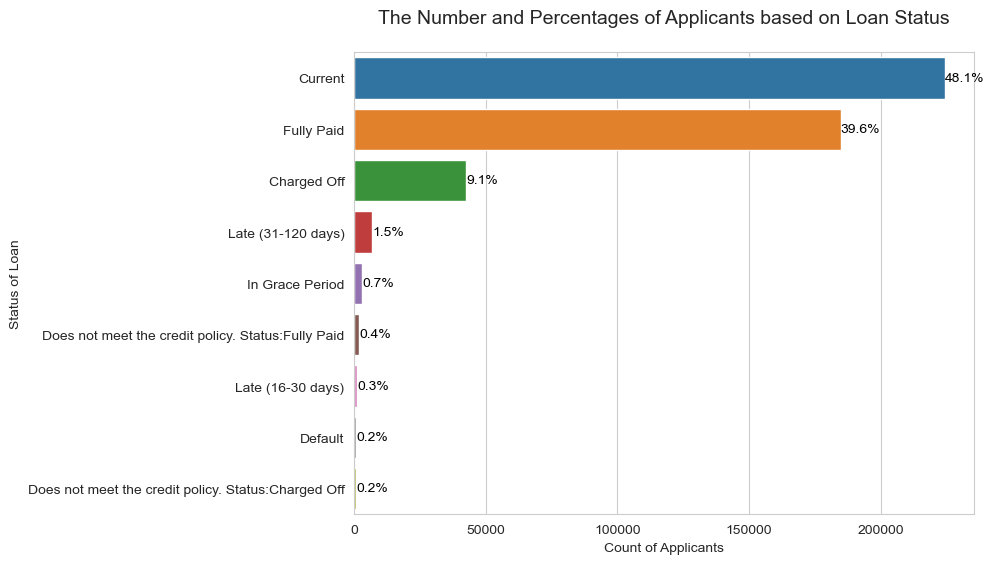

In [24]:
sns.set_style('whitegrid')
grp = df['loan_status'].value_counts().sort_values(ascending=False)
total = len(df['loan_status'])
fig, ax = plt.subplots(figsize=(8, 6))

# Menampilkan grafik bar horizontal
ax = sns.barplot(x=grp.values, y=grp.index)

# Menambahkan keterangan pada setiap batang
for i, v in enumerate(grp.values):
    percentage = '{:.1f}%'.format(100 * v / total)
    ax.text(v + 3, i, percentage, color='black', va='center')

plt.title('The Number and Percentages of Applicants based on Loan Status\n', fontsize=14)
plt.xlabel('Count of Applicants')
plt.ylabel('Status of Loan')

plt.show()

Terdapat sekitar 48% dengan sekitar 224226 pemohon dengan status pinjaman Current, diikuti dengan status pinjaman Fully paid sebesar 39,6% dengan 184739 pemohon.

In [33]:
grp_risk = df.groupby('risk').size().reset_index()
grp_risk.columns = ['target','total']
grp_risk['%'] = round(grp_risk['total']*100/sum(grp_risk['total']),2)
grp_risk.sort_values(by='total', ascending=False)

,target,total,%
1,Good Risk,414099,88.810000
0,Bad Risk,52186,11.190000


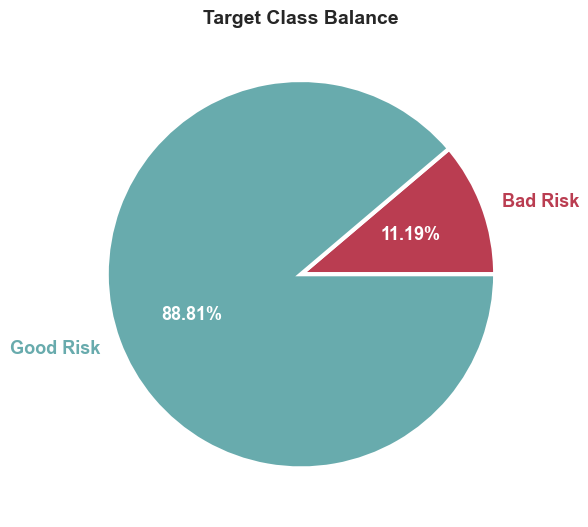

In [34]:
sns.set_style('whitegrid')
labels = ['Bad Risk', 'Good Risk']
colors = ["#ba3d51", "#68abad"]
sns.set_palette(sns.color_palette(colors))

fig, ax = plt.subplots(figsize=(6, 6))

patches, texts, pcts = plt.pie(grp_risk['total'], labels=labels, autopct='%.2f%%', 
        wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
        textprops={'fontsize': 13})

# for each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white', fontweight=600)
plt.setp(texts, fontweight=600)
ax.set_title('Target Class Balance', fontsize=14, fontweight='bold')
plt.tight_layout()

Teramati bahwa kumpulan data ini sangat tidak seimbang dengan kelas minoritas 11% pada Bad risk dan kelas mayoritas 88% pada Good risk.

#### Persebaran Data Kolom Grade 

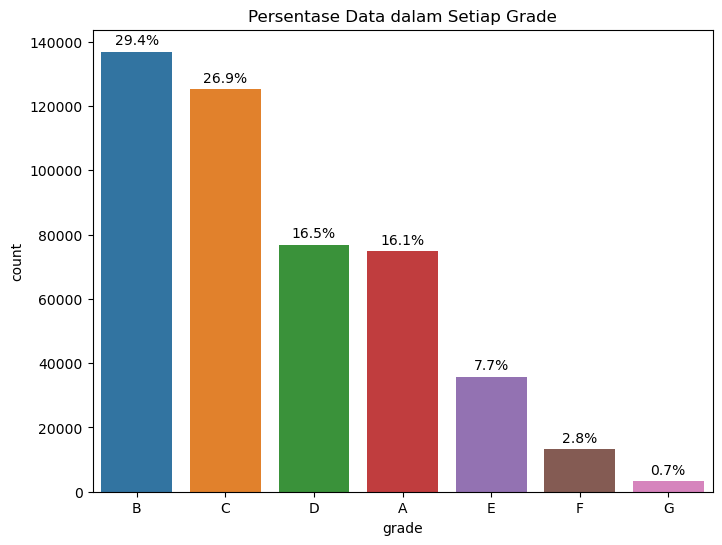

In [7]:
counts = df['grade'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.sort_values(ascending=False)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='grade', order=counts.index)
total = len(df['grade'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Grade')

# Menampilkan grafik
plt.show()

Teramati bahwa data di atas terlihat seimbang dengan kelas mayoritas 29,4% pada grade B dan kelas minoritas pada grade G.

#### Persebaran Data Kolom Sub Grade

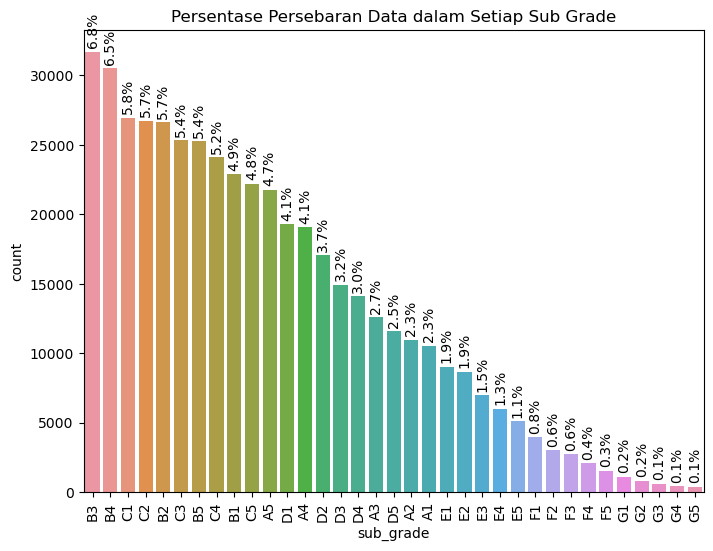

In [16]:

counts = df['sub_grade'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.sort_values(ascending=False)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='sub_grade', order=counts.index)
total = len(df['sub_grade'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5), rotation=90)

# Menampilkan judul
plt.title('Persentase Persebaran Data dalam Setiap Sub Grade')
plt.xticks(rotation=90)
# Menampilkan grafik
plt.show()

Teramati bahwa data di atas terlihat seimbang dengan kelas mayoritas 6,8% pada grade B3 dan kelas minoritas pada grade G5.

#### Persebaran Data Kolom Emp Length

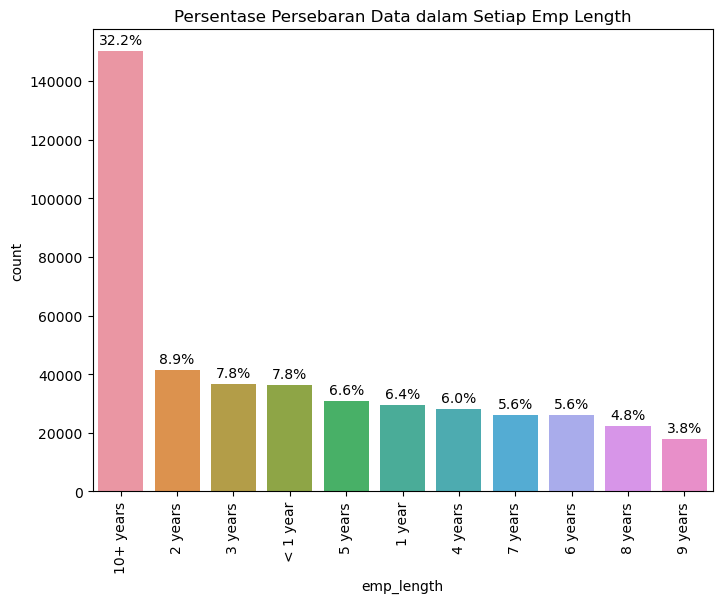

In [18]:

counts = df['emp_length'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.sort_values(ascending=False)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='emp_length', order=counts.index)
total = len(df['emp_length'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Persebaran Data dalam Setiap Emp Length')
plt.xticks(rotation=90)
# Menampilkan grafik
plt.show()

Teramati bahwa persebaran data pada kolom emp_length terlihat tidak seimbang dengan persentase tertinggi dengan 32,2% pada 10+ tahun dan selain kelas tersebut terlihat seimbang dengan persentase terkecil pada 3,8% pada 9 tahun

#### Persentase Persebaran Data Kolom Term

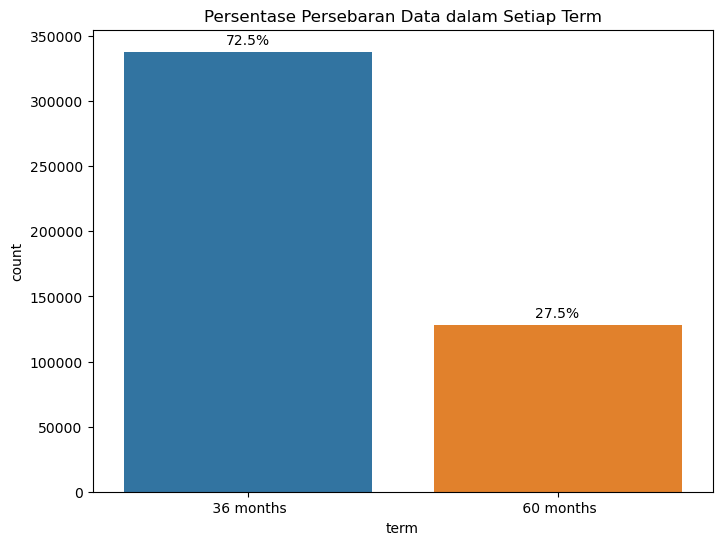

In [20]:

counts = df['term'].value_counts()

# Mengurutkan nilai counts secara menurun
counts = counts.sort_values(ascending=False)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='term', order=counts.index)
total = len(df['term'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Persebaran Data dalam Setiap Term')
# Menampilkan grafik
plt.show()

Teramati bahwa persebaran pada kolom term terlihat masih wajar dengan persentase tertinggi dengan 72,5% pada 36 bulan dan persentase terkecil dengan 27,5% pada 60 bulan. 

#### Jumlah Hari Pemohon dari Bulan Awal Peminjaman Sampai Bulan Terakhir Pembayaran

In [26]:
selisih_bulan_bayar = df[['next_pymnt_d', 'last_pymnt_d', 'issue_d']]

In [27]:
for i, row in df.iterrows():
    if pd.isna(row['next_pymnt_d']):
        if pd.isna(row['last_pymnt_d']):
            continue  # jika C dan B kosong, lanjut ke baris berikutnya
        else:
            selisih_bulan_bayar.at[i, 'selisih_hari'] = row['last_pymnt_d'] - row['issue_d']  # jika C kosong, B dikurangi A
    else:
        selisih_bulan_bayar.at[i, 'selisih_hari'] = row['next_pymnt_d'] - row['issue_d']  # jika C tidak kosong, C dikurangi A


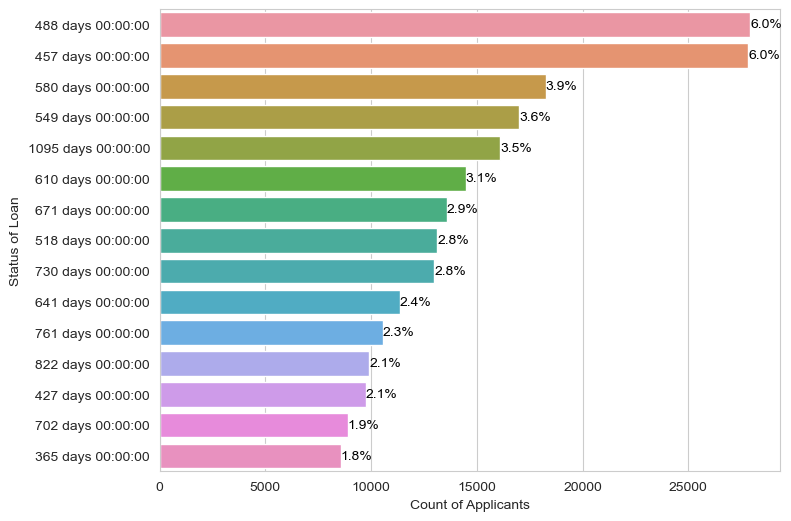

In [39]:
sns.set_style('whitegrid')
grp = selisih_bulan_bayar['selisih_hari'].value_counts().sort_values(ascending=False).head(15)
total = len(selisih_bulan_bayar['selisih_hari'])
fig, ax = plt.subplots(figsize=(8, 6))

# Menampilkan grafik bar horizontal
ax = sns.barplot(x=grp.values, y=grp.index)

# Menambahkan keterangan pada setiap batang
for i, v in enumerate(grp.values):
    percentage = '{:.1f}%'.format(100 * v / total)
    ax.text(v + 3, i, percentage, color='black', ha='left', va='center')

#plt.title('The Number and Percentages of Applicants based on Loan Status\n', fontsize=14)
plt.xlabel('Count of Applicants')
plt.ylabel('Status of Loan')

plt.show()

Pada grafik di atas menjelaskan jumlah hari pada setiap pemohon dari bulan awal peminjaman sampai bulan terakhir pembayaran yang diterima sebanyak 15 data teratas. 

Oleh grafik terlihat seimbang dengan persentase tertinggi dengan 6% pada 488 hari dan 457 hari. Dan persentase terkecil dengan 1,8% pada 365 hari. Yang berarti data lainnya yang tidak ditampilkan memiliki persentase di bawahh 1,8%.

#### Total Credit Line Dibuka Seiring Waktu

In [12]:
df1["earliest_cr_line_year"] = df1["earliest_cr_line"].dt.strftime('%Y')
cline_agg = df1.groupby(["earliest_cr_line_year"])[["id"]].nunique()
cline_agg.rename(columns={"id": "count"}, inplace=True)
cline_agg.reset_index(inplace=True)
cline_agg

,earliest_cr_line_year,count
0,1944,1
1,1946,2
2,1948,1
3,1949,1
4,1950,4
5,1951,3
6,1953,3
7,1954,4
8,1955,7
9,1956,6


In [13]:
def plot_df(df, x, y, title="", xlabel='earliest_cr_line_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

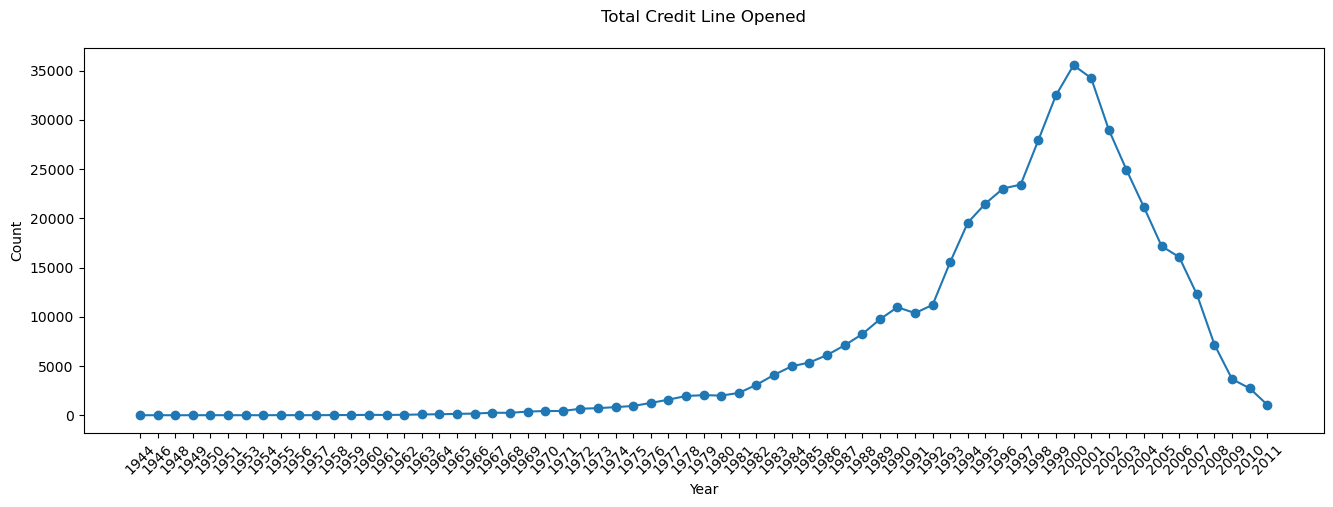

In [14]:
plot_df(cline_agg, x=cline_agg['earliest_cr_line_year'], y=cline_agg["count"], title="Total Credit Line Opened\n", xlabel='Year', ylabel = "Count")

Jumlah tertinggi terjadi pada tahun 2000 dengan 35.539 jalur kredit dibuka. Namun setelah itu, jumlah credit line yang dibuka terus berkurang.

### Status Resiko terhadap Kolom Lainnya

In [35]:
good = df[df['risk'] == 'Good Risk']
bad = df[df['risk'] == 'Bad Risk']

#### Status Resiko terhadap Kolom Term

In [327]:
# in general
df['term'].value_counts(normalize=True)

 36 months   0.724778
 60 months   0.275222
Name: term, dtype: float64

In [329]:
# good risk
grp_term = good.groupby('term').size().reset_index()
grp_term.columns = ['term', 'total']
grp_term['%'] = round(grp_term['total']*100/sum(grp_term['total']),2)
print('Good Risk Status by Term')
grp_term.sort_values(by='total', ascending=False)

Good Risk Status by Term


,term,total,%
0,36 months,304374,73.500000
1,60 months,109725,26.500000


In [330]:
# bad risk
grp_term = bad.groupby('term').size().reset_index()
grp_term.columns = ['term', 'total']
grp_term['%'] = round(grp_term['total']*100/sum(grp_term['total']),2)
print('Bad Risk Status by Term')
grp_term.sort_values(by='total', ascending=False)

Bad Risk Status by Term


,term,total,%
0,36 months,33579,64.340000
1,60 months,18607,35.660000


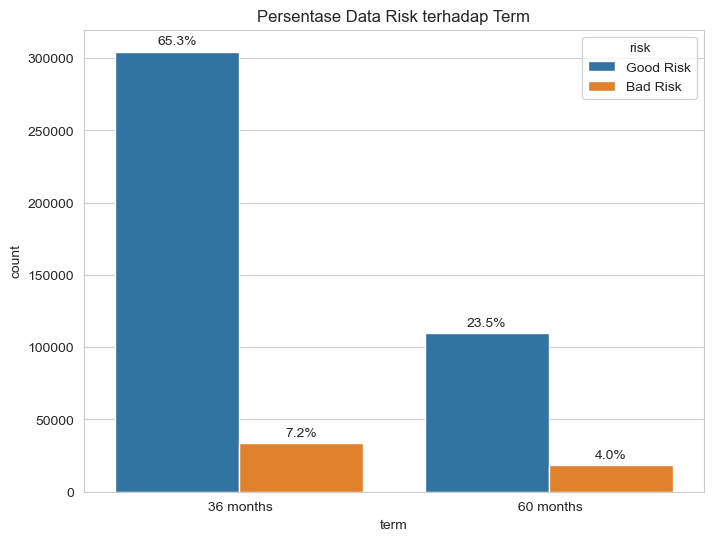

In [18]:
counts = df['term'].value_counts()
sns.set_style('whitegrid')
# Mengurutkan nilai counts secara menurun
counts = counts.sort_values(ascending=False)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='term', hue='risk', order=counts.index)
total = len(df['risk'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data Risk terhadap Term')
# Menampilkan grafik
plt.show()

- Terdapat 2 jangka waktu pinjaman, yaitu 36 bulan dan 60 bulan yang terlihat tidak seimbang pada bagian 36 bulan dan cukup seimbang pada bagian 60 bulan.

- Good risk pada 36 bulan memiliki 2 kali lebih baik dari pada 60 bulan. Dan persentase tertinggi ada pada Good risk di 36 bulan dengan 65,3% dan persentase terkecil pada Bad risk di 36 bulan dengan 7,2%

- Bad risk pada 36 bulan memiliki hampir 2 kali lebih berisiko dari pada 60 bulan. Dan persentase tertinggi ada pada Good risk di 60 bulan dengan 23,5% dan persentase terkecil pada Badrisk di 60 bulan dengan 4%.

#### Status Resiko terhadap Status Verifikasi

In [332]:
df['verification_status'].value_counts(normalize=True)

Verified          0.360413
Source Verified   0.321677
Not Verified      0.317911
Name: verification_status, dtype: float64

In [333]:
grp_vs = good.groupby(['verification_status']).size().reset_index()
grp_vs.columns = ['verification_status', 'total']
grp_vs['%'] = round(grp_vs['total']*100/sum(grp_vs['total']),2)
print('Good Risk Status by Verification Status')
grp_vs.sort_values(by='total', ascending=False)

Good Risk Status by Verification Status


,verification_status,total,%
2,Verified,146164,35.300000
0,Not Verified,134032,32.370000
1,Source Verified,133903,32.340000


In [334]:
grp_vs = bad.groupby(['verification_status']).size().reset_index()
grp_vs.columns = ['verification_status', 'total']
grp_vs['%'] = round(grp_vs['total']*100/sum(grp_vs['total']),2)
print('Bad Risk Status by Verification Status')
grp_vs.sort_values(by='total', ascending=False)

Bad Risk Status by Verification Status


,verification_status,total,%
2,Verified,21891,41.950000
1,Source Verified,16090,30.830000
0,Not Verified,14205,27.220000


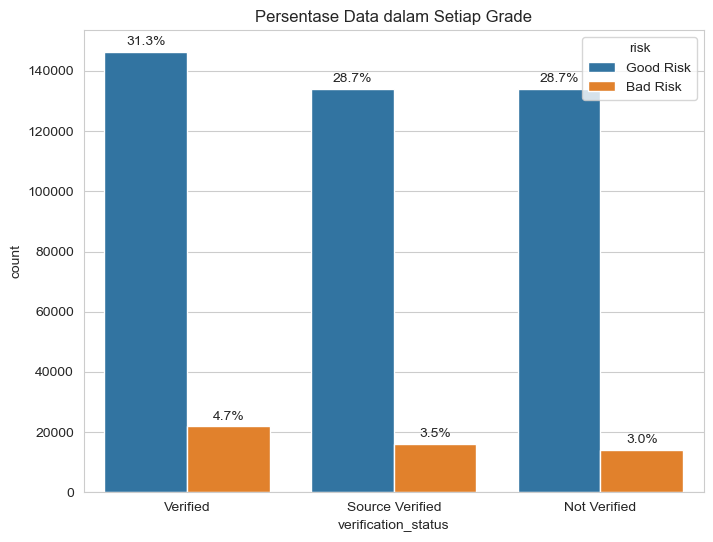

In [16]:
counts = df['verification_status'].value_counts()
sns.set_style('whitegrid')
# Mengurutkan nilai counts secara menurun
counts = counts.sort_values(ascending=False)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='verification_status', hue='risk', order=counts.index)
total = len(df['risk'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Grade')
# Menampilkan grafik
plt.show()

- Status Verifikasi memberi tahu bahwa apakah pinjaman diverifikasi, tidak verifikasi, dan sumber pinjaman diverifikasi

- Pada grafik terlihat bahwa pada setiap bagiannya terlihat tidak seimbang dengan persentase tertinggi ada pada Good risk di bagian Verified, Source Verified, dan Not Verified.

- Persentase tertinggi dengan 31,3%, 28,7%, 28,7% pada kolom verification_status dari seluruh data risk.

#### Status Resiko terhadap Perencanaan Pembayaran

In [44]:
# Mengganti isi data pada kolom payment plan 
df['pymnt_plan'] = df['pymnt_plan'].replace(['n','y'],['No','Yes'])

In [45]:
df['pymnt_plan'].value_counts(normalize=True)

No    0.999981
Yes   0.000019
Name: pymnt_plan, dtype: float64

In [338]:
grp_pp = good.groupby(['pymnt_plan']).size().reset_index()
grp_pp.columns = ['pymnt_plan', 'total']
grp_pp['%'] = round(grp_pp['total']*100/sum(grp_pp['total']),2)
print('Good Risk Status by Payment Plan')
grp_pp.sort_values(by='total', ascending=False)

Good Risk Status by Payment Plan


,pymnt_plan,total,%
0,n,414095,100.000000
1,y,4,0.000000


In [339]:
grp_pp = bad.groupby(['pymnt_plan']).size().reset_index()
grp_pp.columns = ['pymnt_plan', 'total']
grp_pp['%'] = round(grp_pp['total']*100/sum(grp_pp['total']),2)
print('Bad Risk Status by Payment Plan')
grp_pp.sort_values(by='total', ascending=False)

Bad Risk Status by Payment Plan


,pymnt_plan,total,%
0,n,52181,99.990000
1,y,5,0.010000


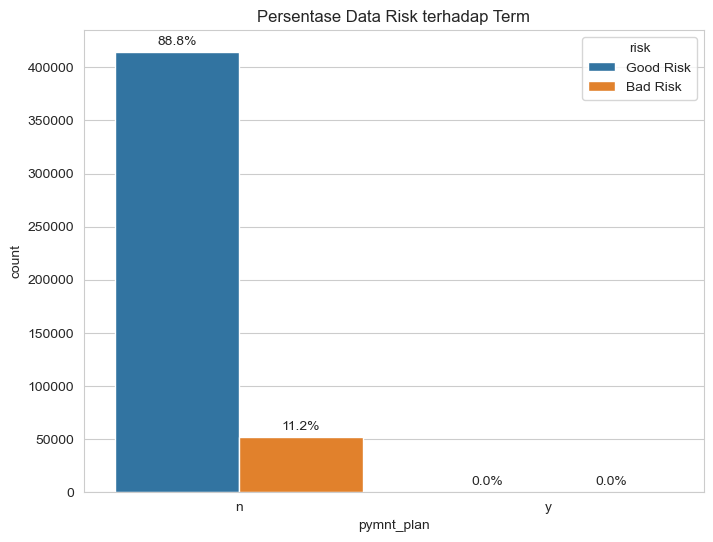

In [12]:
counts = df['pymnt_plan'].value_counts()
sns.set_style('whitegrid')
# Mengurutkan nilai counts secara menurun
counts = counts.sort_values(ascending=False)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='pymnt_plan', hue='risk', order=counts.index)
total = len(df['risk'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data Risk terhadap Term')
# Menampilkan grafik
plt.show()

- Terlihat bahwa pada No dan Yes pada kolom pyment_plan sangat tidak imbang sekali dengan 99% pada bagian No.

- Hanya 9 pemohon dari 466.276 peminjaman yang sudah menyiapkan pembayaran dari sebelum memulai pinjaman dengan 4 pemohon pada bagian Good risk dan 5 pemohon Bad risk

#### Status Resiko terhadap Grade

In [341]:
df['grade'].value_counts(normalize=True)

B   0.293659
C   0.268705
D   0.164895
A   0.160561
E   0.076685
F   0.028371
G   0.007124
Name: grade, dtype: float64

In [342]:
grp_g = good.groupby(['grade']).size().reset_index()
grp_g.columns = ['grade', 'total']
grp_g['%'] = round(grp_g['total']*100/sum(grp_g['total']),2)
print('Good Risk by Grade')
grp_g.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
1,B,125921,30.410000
2,C,110550,26.700000
0,A,71912,17.370000
3,D,64756,15.640000
4,E,28618,6.910000
5,F,9962,2.410000
6,G,2380,0.570000


In [343]:
grp_g = bad.groupby(['grade']).size().reset_index()
grp_g.columns = ['grade', 'total']
grp_g['%'] = round(grp_g['total']*100/sum(grp_g['total']),2)
print('Good Risk by Grade')
grp_g.sort_values(by='total', ascending=False)

Good Risk by Grade


,grade,total,%
2,C,14743,28.250000
3,D,12132,23.250000
1,B,11008,21.090000
4,E,7139,13.680000
5,F,3267,6.260000
0,A,2955,5.660000
6,G,942,1.810000


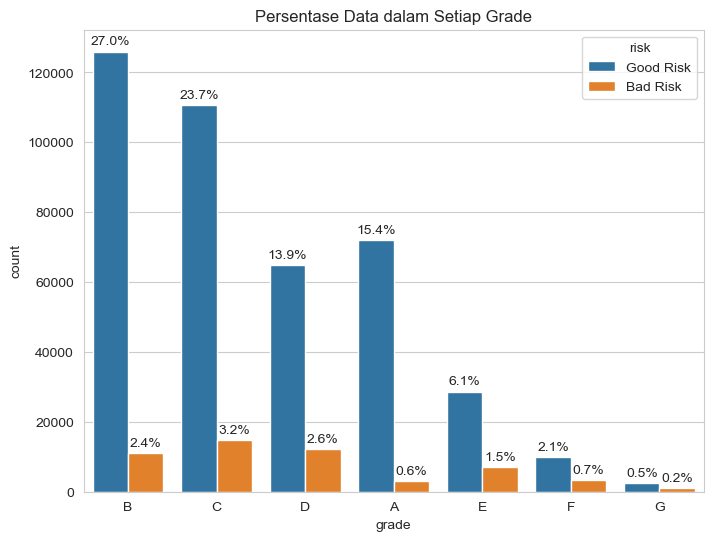

In [17]:
counts = df['grade'].value_counts()
sns.set_style('whitegrid')
# Mengurutkan nilai counts secara menurun
counts = counts.sort_values(ascending=False)

# Membuat grafik countplot dengan persentase dan urutan yang telah diurutkan
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='grade', hue='risk', order=counts.index)
total = len(df['grade'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', textcoords='offset points', xytext=(0,5))

# Menampilkan judul
plt.title('Persentase Data dalam Setiap Grade')
# Menampilkan grafik
plt.show()

- Kolom Grade memberi tahu bahwa nilai pinjaman yang diberikan oleh perusahaan pemberi pinjaman. ada 7 grade dari A sampai G.

- Sebagian besar pinjaman berperingkat B (29,3%). Ada sekitar 72% pinjaman berperingkat C ke atas, dan kurang dari 1% pinjaman berperingkat G.

#### Total Pinjaman yang dibuka

In [12]:
df1=df.copy()

In [13]:
df1["issue_d_year"] = df1["issue_d"].dt.strftime('%Y')
issue_agg = df1.groupby(["issue_d_year"])[["id"]].nunique()
issue_agg.rename(columns={"id": "count"}, inplace=True)
issue_agg.reset_index(inplace=True)
issue_agg

,issue_d_year,count
0,2007,603
1,2008,2393
2,2009,5281
3,2010,12537
4,2011,21721
5,2012,53367
6,2013,134755
7,2014,235628


In [14]:
# table
issue_agg2 = df1.groupby(['issue_d_year', 'risk'])[["id"]].count()
issue_agg2.rename(columns={'id': 'count'}, inplace=True)
issue_agg2.reset_index(inplace=True)
issue_agg2 = issue_agg2.pivot(index=['issue_d_year'], columns='risk', values='count').reset_index()
issue_agg2 = issue_agg2.reset_index(drop=True).rename_axis(None, axis=1)
issue_agg2

,issue_d_year,Bad Risk,Good Risk
0,2007,158,445
1,2008,496,1897
2,2009,723,4558
3,2010,1761,10776
4,2011,3270,18451
5,2012,8361,45006
6,2013,17118,117637
7,2014,20299,215329


In [15]:
def plot_df(df, x, y, title="", xlabel='issue_d_year', ylabel='count', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.xticks(rotation=45)
    plt.show()

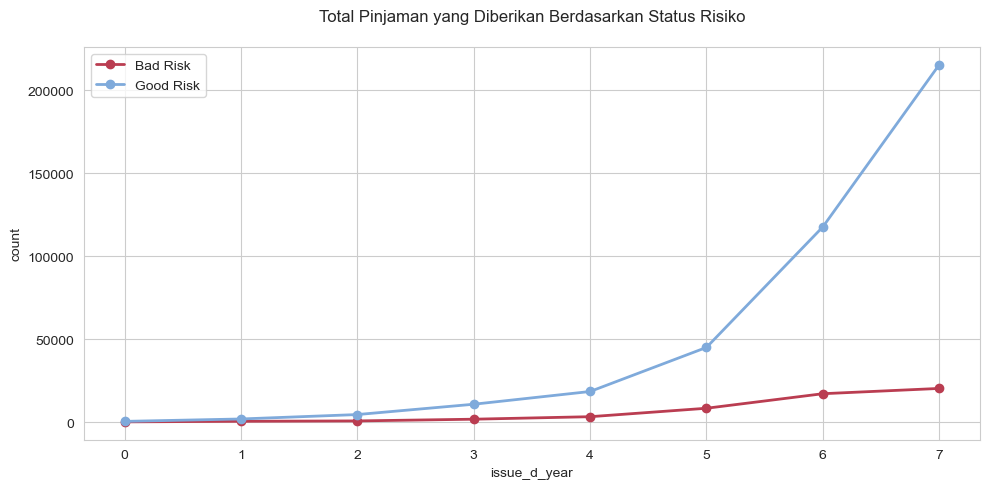

In [16]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10,5))
issue_agg2.plot(kind='line', ax=ax, lw=2,
                color=['#ba3d51', '#7faadb'],
                marker='o')

ax.set_title('Total Pinjaman yang Diberikan Berdasarkan Status Risiko\n',
        fontsize=12)
ax.set_xlabel('issue_d_year')
ax.set_ylabel('count')
plt.tight_layout()
plt.show()

- Pada grafik, sumbu X yang menampilkan perkembangan dari data 0-7 yang bermaksud
dari tahun 2007-2014. 

- Pada Good risk bahwa pada peminjaman di tiap tahunnya menunjukkan kenaikan yang cukup tinggi yang berarti pada tiap tahunnya bertambah banyak peminjam yang dapat mengembalikkan uang dengan tepat waktu

- Pada Bad risk bahwa pada peminjjaman di tiap tahunnya menunjukkan kenaikan dengan tidak terlalu tinggi di tiap tahunnya yang berarti pada tiap tahunnya bertambah dengan tidak tinggi peminjam yang dapat mengembalikkan uang dengan tidak tepat waktu/telat

- Jadi, sepertinya walaupun sama-sama naik antara Good risk dan Bad risk tetapi tetap mendapat keuntungan karena pada peminjam yang berkategori good risk memiliki kenaikan yang cukup tinggi di tiap tahunnya yang dapat menutupi kerugian dari peminjam yang masuk ke kategori Bad risk

# Data Cleaning

In [33]:
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
0,1077501,5000,5000,4975.000000,36 months,10.650000,162.870000,B,B2,10+ years,RENT,24000.000000,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.650000,0.000000,1985-01-01,1.000000,NaN,NaN,3.000000,0.000000,13648,83.700000,9.000000,f,0.000000,0.000000,5861.071414,5831.780000,5000.000000,861.070000,0.000000,0.000000,0.000000,2015-01-01,171.620000,NaT,2016-01-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Risk
1,1077430,2500,2500,2500.000000,60 months,15.270000,59.830000,C,C4,< 1 year,RENT,30000.000000,Source Verified,2011-12-01,Charged Off,n,car,GA,1.000000,0.000000,1999-04-01,5.000000,NaN,NaN,3.000000,0.000000,1687,9.400000,4.000000,f,0.000000,0.000000,1008.710000,1008.710000,456.460000,435.170000,0.000000,117.080000,1.110000,2013-04-01,119.660000,NaT,2013-09-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bad Risk
2,1077175,2400,2400,2400.000000,36 months,15.960000,84.330000,C,C5,10+ years,RENT,12252.000000,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.720000,0.000000,2001-11-01,2.000000,NaN,NaN,2.000000,0.000000,2956,98.500000,10.000000,f,0.000000,0.000000,3003.653644,3003.650000,2400.000000,603.650000,0.000000,0.000000,0.000000,2014-06-01,649.910000,NaT,2016-01-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Risk
3,1076863,10000,10000,10000.000000,36 months,13.490000,339.310000,C,C1,10+ years,RENT,49200.000000,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.000000,0.000000,1996-02-01,1.000000,35.000000,NaN,10.000000,0.000000,5598,21.000000,37.000000,f,0.000000,0.000000,12226.302210,12226.300000,10000.000000,2209.330000,16.970000,0.000000,0.000000,2015-01-01,357.480000,NaT,2015-01-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Risk
4,1075358,3000,3000,3000.000000,60 months,12.690000,67.790000,B,B5,1 year,RENT,80000.000000,Source Verified,2011-12-01,Current,n,other,OR,17.940000,0.000000,1996-01-01,0.000000,38.000000,NaN,15.000000,0.000000,27783,53.900000,38.000000,f,766.900000,766.900000,3242.170000,3242.170000,2233.100000,1009.070000,0.000000,0.000000,0.000000,2016-01-01,67.790000,2016-02-01,2016-01-01,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good Risk


Menghapus kolom "id" dikarenakan tidak dibutuhkan pada bagian ini

In [11]:
df.drop(['id'], inplace= True, axis=1)
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,risk
325789,12000,12000,12000.000000,36 months,8.390000,378.200000,A,A5,10+ years,MORTGAGE,81000.000000,Verified,2014-09-01,Current,n,credit_card,MA,12.580000,0.000000,1989-06-01,0.000000,63.000000,NaN,15.000000,0.000000,24601,47.300000,24.000000,f,7036.040000,7036.040000,6051.200000,6051.200000,4963.960000,1087.240000,0.000000,0.000000,0.000000,2016-01-01,378.200000,2016-02-01,2016-01-01,0.000000,63.000000,NaN,NaN,NaN,0.000000,0.000000,307706.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52000.000000,NaN,NaN,NaN,Good Risk


In [35]:
print('Duplication status:', df.duplicated().values.any())
print('The number of duplication is:', df.duplicated().sum())

Duplication status: False
The number of duplication is: 0


In [36]:
print('Missing values status:', df.isnull().values.any())
percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': percent_mv})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
open_il_24m,float64,100.000000
il_util,float64,100.000000
annual_inc_joint,float64,100.000000
dti_joint,float64,100.000000
open_il_6m,float64,100.000000
open_il_12m,float64,100.000000
open_acc_6m,float64,100.000000
mths_since_rcnt_il,float64,100.000000
total_bal_il,float64,100.000000
open_rv_12m,float64,100.000000


Drop features that have large number of missing values (> 50%)

In [12]:
# Menghapus urutan kolom dari susunan kolom pada Preview Data
df.drop(df.iloc[:, 47:64], inplace=True, axis=1)
df.drop(['dti_joint', 'annual_inc_joint', 'mths_since_last_record', 
         'mths_since_last_major_derog'], inplace=True, axis=1)

In [13]:
df.drop(['inq_last_12m','verification_status_joint'] , inplace=True, axis=1)

In [42]:
print('Missing values status:', df.isnull().values.any())
percent_mv = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
mv_df = pd.DataFrame({'data type':dtypes,
                                 '%': percent_mv})
mv_df.sort_values('%', ascending=False, inplace=True)
mv_df

Missing values status: True


,data type,%
mths_since_last_delinq,float64,53.690554
next_pymnt_d,datetime64[ns],48.728567
emp_length,object,4.505399
last_pymnt_d,datetime64[ns],0.080637
revol_util,float64,0.072917
collections_12_mths_ex_med,float64,0.031097
last_credit_pull_d,datetime64[ns],0.009007
pub_rec,float64,0.006219
open_acc,float64,0.006219
inq_last_6mths,float64,0.006219


<Axes: xlabel='mths_since_last_delinq', ylabel='Density'>

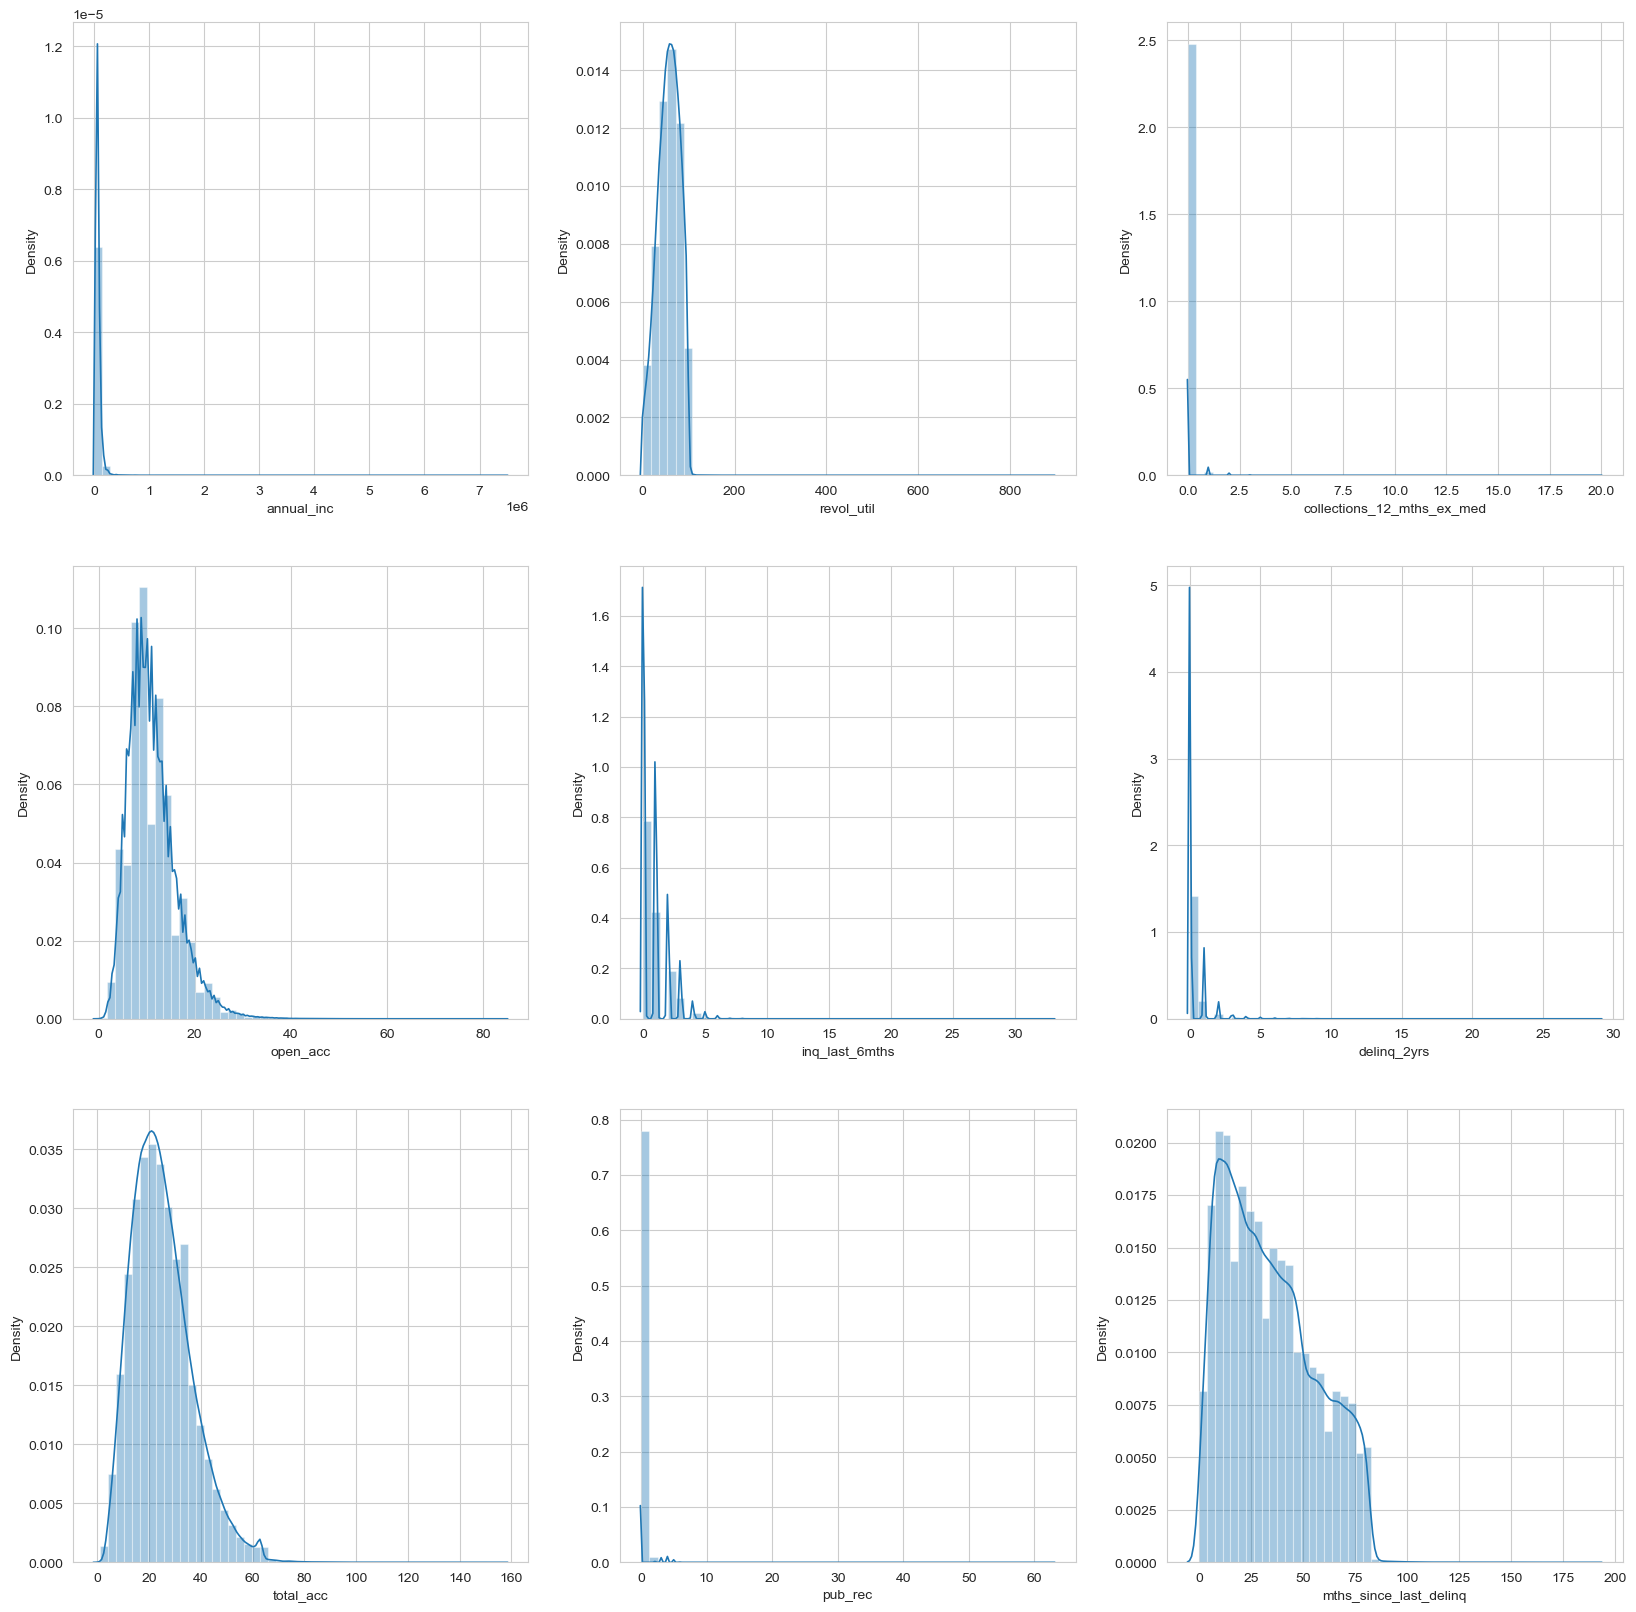

In [17]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,3, figsize=(20,20))
sns.set_context('paper', font_scale=1)

sns.distplot(df['annual_inc'], ax=ax[0][0])
sns.distplot(df['revol_util'], ax=ax[0][1])
sns.distplot(df['collections_12_mths_ex_med'], ax=ax[0][2])
sns.distplot(df['open_acc'], ax=ax[1][0])
sns.distplot(df['inq_last_6mths'], ax=ax[1][1])
sns.distplot(df['delinq_2yrs'], ax=ax[1][2])
sns.distplot(df['total_acc'], ax=ax[2][0])
sns.distplot(df['pub_rec'], ax=ax[2][1])
sns.distplot(df['mths_since_last_delinq'], ax=ax[2][2])

- Hitung nilai yang hilang dengan median karena data miring untuk fitur numerik
- Hitung nilai yang hilang dengan mode untuk fitur kategorikal

In [14]:
cat_columns = df.select_dtypes(include=['object','datetime64[ns]']).columns.tolist()
num_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df:
    if df[column].isnull().any():
        if(column in cat_columns):
            df[column]=df[column].fillna(df[column].mode()[0])
        else:
            df[column]=df[column].fillna(df[column].median())

In [44]:
print('Missing values status:', df.isnull().values.any())

Missing values status: False


In [45]:
print('Missing Value:', df.isna().sum().values.sum())
print('Duplicated Value:', df.duplicated().sum())

Missing Value: 0
Duplicated Value: 0


# Data Preprocessing

### Drop Kolom yang Tidak Perlu

Drop kolom "loan status" karena tidak diperlukan. Untuk prediksi, akan menggunakan kolom risk sebagai target di prediksi.

In [15]:
df.drop(['loan_status'], inplace=True, axis=1)

### Membuat Kolom Baru dari Kolom Tipe Tanggal

Memisahkan Kolom-kolom ini menjadi hari, bulan, dan tahun.
- `issue_d` : Bulan dimana pinjaman dibiayai.
- `earliest_cr_line` : Bulan saat batas kredit paling awal yang dilaporkan pemohon dibuka.
- `last_pymnt_d` : Pembayaran bulan lalu diterima.
- `next_pymnt_d` : Tanggal pembayaran terjadwal berikutnya.
- `last_credit_pull_d` : Bulan terakhir LC menarik kredit untuk pinjaman ini.

In [16]:
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month
df["issue_d_day"] = df["issue_d"].dt.day

df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month
df["earliest_cr_line_day"] = df["earliest_cr_line"].dt.day

df["last_pymnt_d_year"] = df["last_pymnt_d"].dt.year
df["last_pymnt_d_month"] = df["last_pymnt_d"].dt.month
df["last_pymnt_d_day"] = df["last_pymnt_d"].dt.day

df["next_pymnt_d_year"] = df["next_pymnt_d"].dt.year
df["next_pymnt_d_month"] = df["next_pymnt_d"].dt.month
df["next_pymnt_d_day"] = df["next_pymnt_d"].dt.day

df["last_credit_pull_d_year"] = df["last_credit_pull_d"].dt.year
df["last_credit_pull_d_month"] = df["last_credit_pull_d"].dt.month
df["last_credit_pull_d_day"] = df["last_credit_pull_d"].dt.day

In [17]:
# drop the original
df.drop(['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'], inplace=True, axis=1)

In [24]:
df.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,risk,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day
13831,8000,8000,8000.000000,36 months,5.990000,243.340000,A,A2,< 1 year,RENT,80000.000000,Source Verified,n,wedding,AZ,23.350000,0.000000,0.000000,31.000000,11.000000,0.000000,3962,25.100000,25.000000,f,0.000000,0.000000,8759.933908,8759.930000,8000.000000,759.930000,0.000000,0.000000,0.000000,245.910000,0.000000,Good Risk,2011,6,1,2000,4,1,2014,6,1,2016,2,1,2015,11,1


## Encoding


In [18]:
df.select_dtypes(include='object').columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'addr_state',
 'initial_list_status',
 'risk']

Tipe data kolom di atas diencoding dengan beberapa metode encoding dikarenakan tidak semua pada kolom tersebut cocok jika seluruhnya dilakukan dengan 1 metode encoding saja.

### One-Hot Encoding

`home_ownership`, `verification_status`, `pymnt_plan`, `purpose`, `initial_list_status` akan di encoding menggunakan one hot encoding karena fitur ini merupakan data non-ordinal.

In [19]:
df_1 = df.drop(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'], axis=1)
cat_1 = df[['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']]

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
oho = OneHotEncoder(sparse=False)

df_encoded = pd.DataFrame(oho.fit_transform(cat_1))
#df_encoded.columns = oho.get_feature_names(['home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status'])
concatenated_data = pd.concat([df_1, df_encoded], axis=1)
concatenated_data.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,risk,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
115225,9000,9000,9000.000000,36 months,14.330000,309.050000,C,C2,4 years,44000.000000,CA,9.720000,1.000000,0.000000,21.000000,5.000000,0.000000,5032,49.800000,8.000000,1781.710000,1781.710000,9267.370000,9267.370000,7218.290000,2049.080000,0.000000,0.000000,0.000000,309.050000,0.000000,Good Risk,2013,7,1,2007,12,1,2016,1,1,2016,2,1,2016,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


### Manual Encoding

Kolom `emp_length` akan dikodekan secara manual karena maknanya akan berubah jika dilakukan dengan pengkodean label.

In [22]:
concatenated_data['emp_length'].replace({'< 1 year':0, '1 year':1, '2 years':2,
                                           '3 years':3, '4 years':4, '5 years':5,
                                           '6 years':6, '7 years':7, '8 years':8, 
                                           '9 years':9, '10+ years':10},inplace=True)

### Label Encoding

`term`, `grade`, `sub_grade`, `risk`, `initial_list_status` akan dikodekan menggunakan label encoding karena fitur ini adalah data ordinal.

In [23]:
from sklearn.preprocessing import LabelEncoder

# convert all non-numeric variables (ordinal) to numeric type
for column in concatenated_data.columns:
    if concatenated_data[column].dtype == np.number: continue
    # perform encoding for each non-numeric variables
    concatenated_data[column] = LabelEncoder().fit_transform(concatenated_data[column])

In [58]:
concatenated_data.sample()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,risk,issue_d_year,issue_d_month,issue_d_day,earliest_cr_line_year,earliest_cr_line_month,earliest_cr_line_day,last_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_day,next_pymnt_d_year,next_pymnt_d_month,next_pymnt_d_day,last_credit_pull_d_year,last_credit_pull_d_month,last_credit_pull_d_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
296236,819,819,21200.000000,1,25.570000,629.360000,5,29,4,47147.000000,5,42,18.920000,0.000000,0.000000,31.000000,5.000000,0.000000,1686,25.200000,8.000000,0.000000,0.000000,25506.880000,25506.880000,21200.000000,4306.880000,0.000000,0.000000,0.000000,20502.120000,0.000000,1,7,9,0,61,11,0,8,6,0,9,1,0,8,7,0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


### Seleksi Kolom

In [24]:
corr = concatenated_data.corrwith(concatenated_data["risk"])
corr.reset_index(name='corr value').sort_values('corr value', ascending=False)

,index,corr value
31,risk,1.000000
24,total_rec_prncp,0.254255
38,last_pymnt_d_year,0.252786
23,total_pymnt_inv,0.194638
22,total_pymnt,0.193977
29,last_pymnt_amnt,0.170164
20,out_prncp,0.150442
21,out_prncp_inv,0.150430
44,last_credit_pull_d_year,0.140588
32,issue_d_year,0.077592


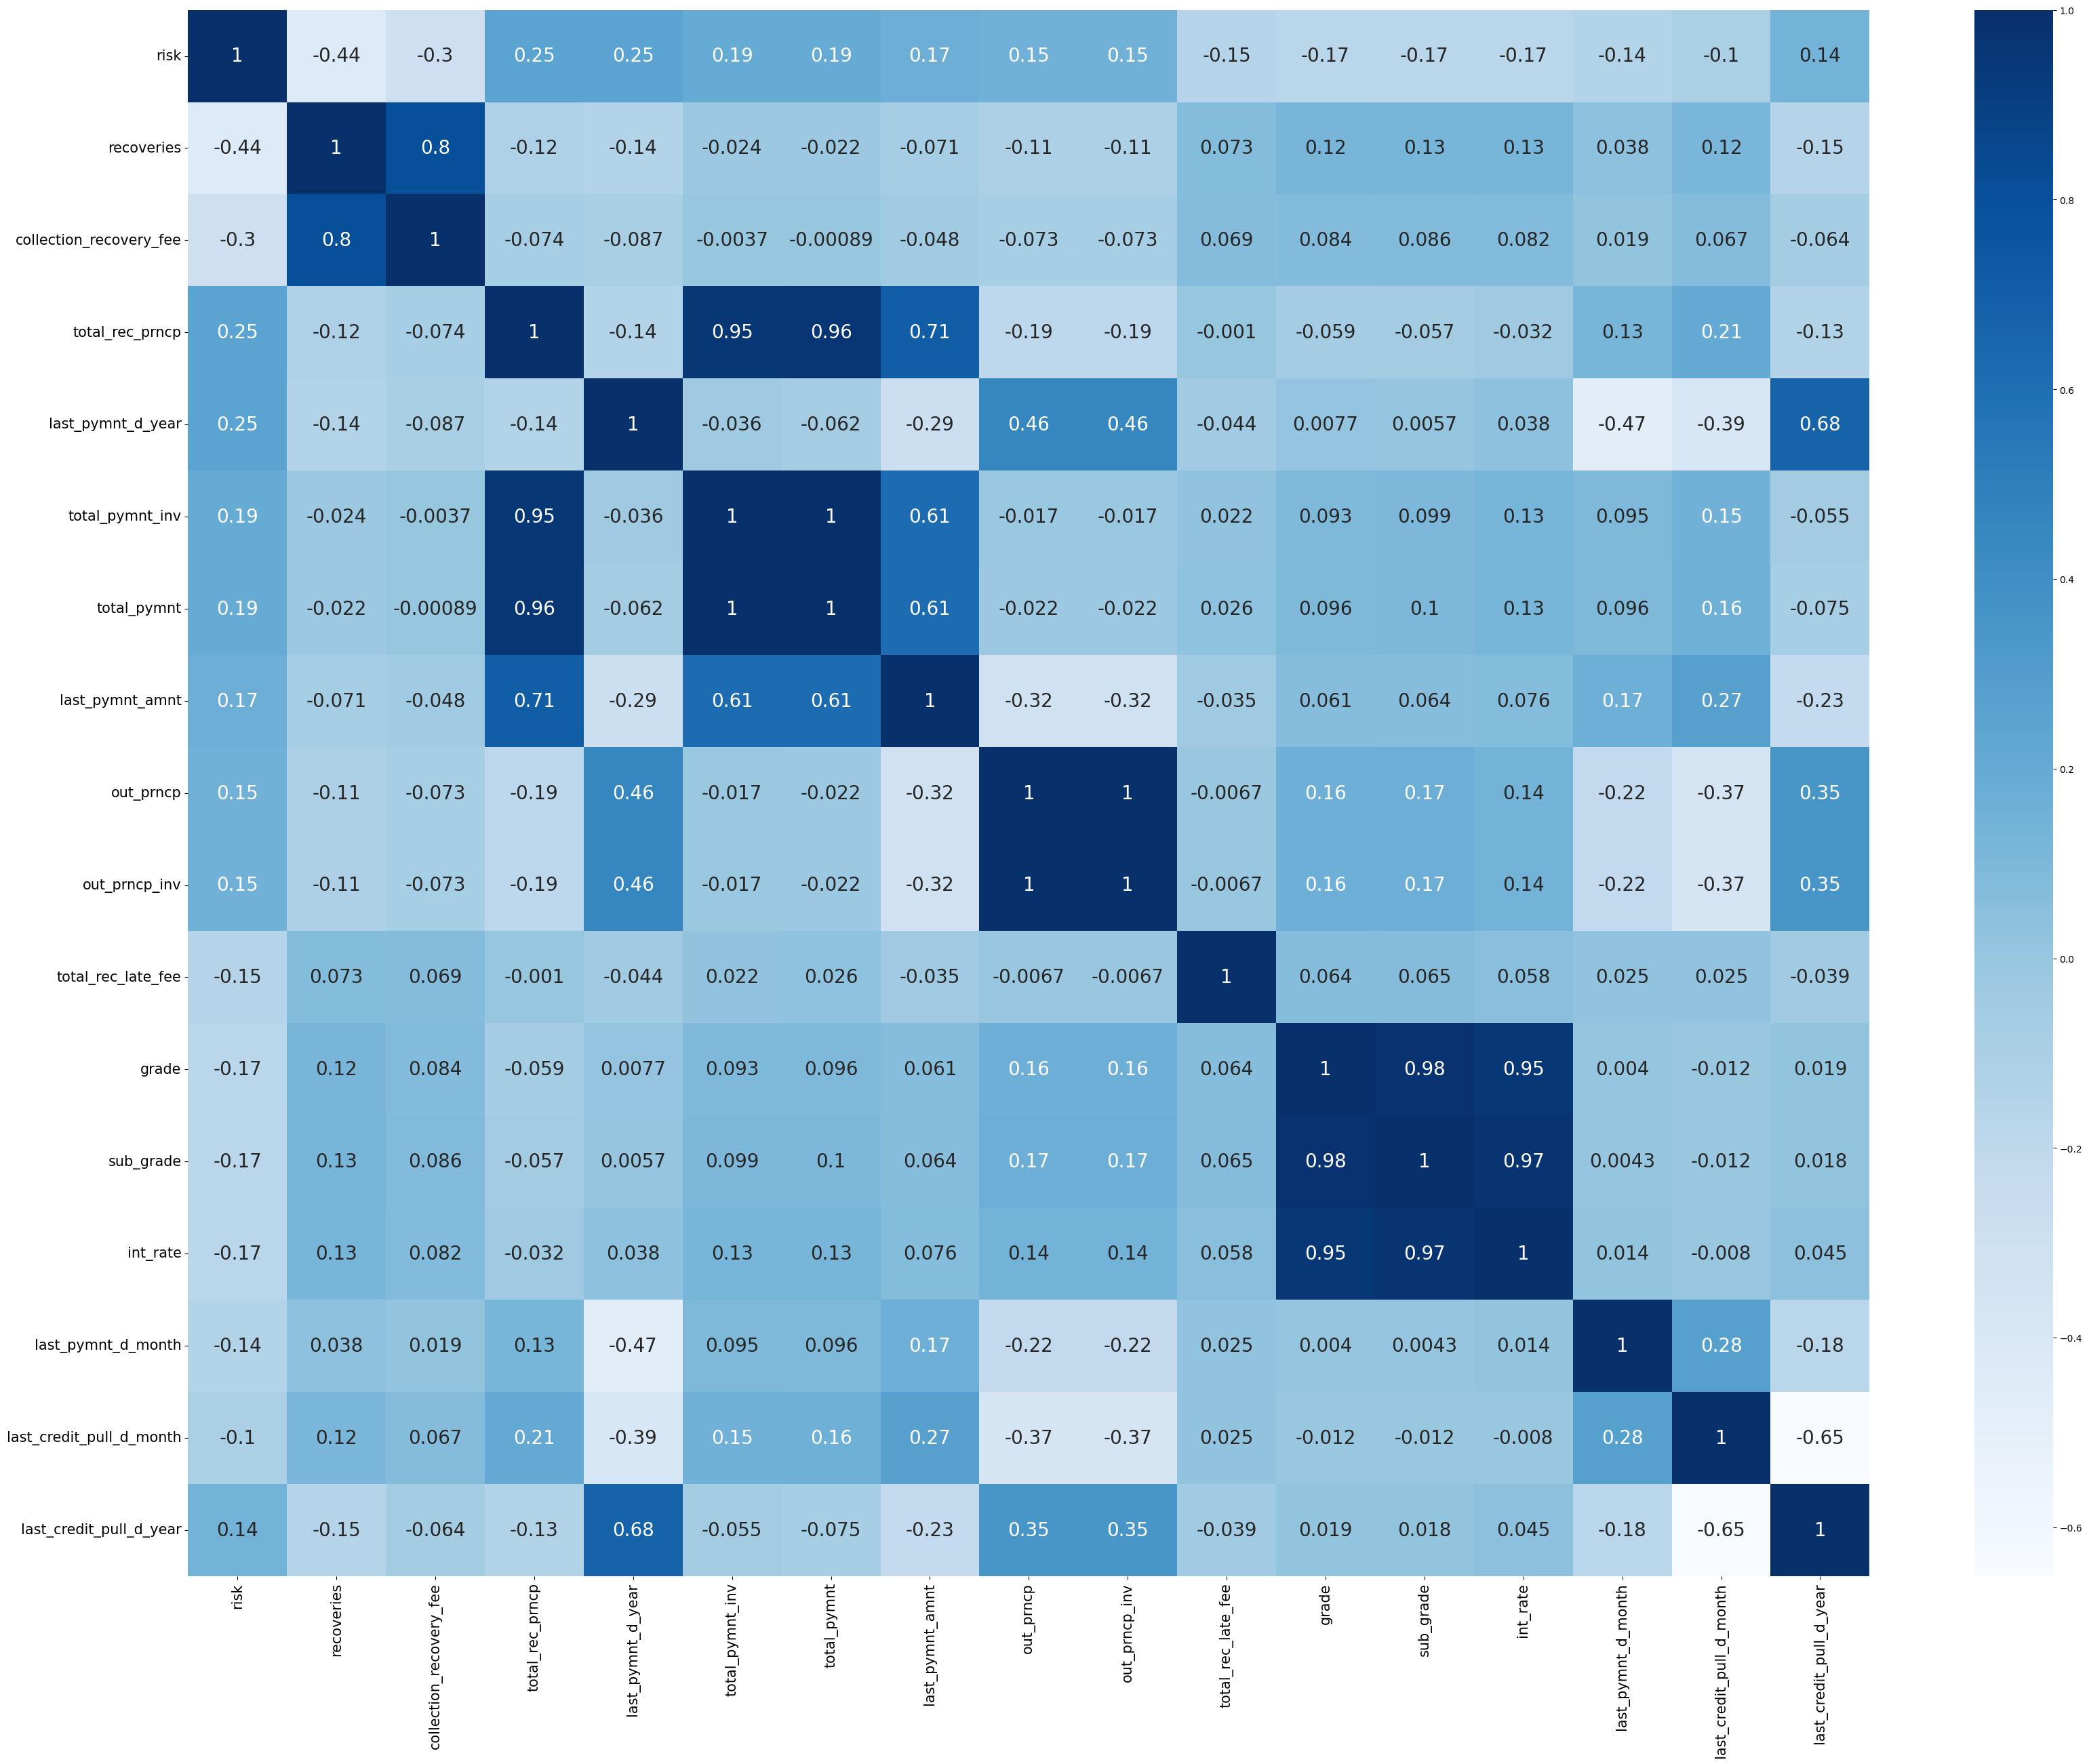

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(40, 30))
corr_data = concatenated_data[['risk', 'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'last_pymnt_d_year',
                               'total_pymnt_inv', 'total_pymnt', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv',
                               'total_rec_late_fee', 'grade', 'sub_grade', 'int_rate', 'last_pymnt_d_month',
                               'last_credit_pull_d_month', 'last_credit_pull_d_year']]

# Membuat heatmap dan menyesuaikan ukuran font angka dan korelasi
sns.heatmap(corr_data.corr(), cmap='Blues', annot=True, annot_kws={"size": 20})

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.show()


- Fitur yang memiliki nilai korelasi tinggi dengan status risiko (fitur target) adalah `pemulihan`.
- `collection_recovery_fee`, `total_rec_prncp` , `last_pymnt_d_year`, `total_pymnt_inv`, `total_pymnt`, `last_pymnt_amnt`, `out_prncp`, `out_prncp_inv`, `total_rec_late_fee`, `grade`, `sub_grade` , `int_rate`, ` last_credit_pull_d_year` , `last_credit_pull_d_month`, dan `last_pymnt_d_month` memiliki nilai korelasi yang rendah namun nilai korelasinya masih lebih besar dibandingkan fitur lainnya (corr > 0.10).

### Handling Imbalanced Data

In [26]:
x = corr_data.drop(['risk'], axis=1) #features
y = corr_data['risk'] #target

In [27]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) # good risk
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0))) # bad risk
  
# import SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
x_balanced_res, y_balanced_res = sm.fit_resample(x, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(x_balanced_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_balanced_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

Before OverSampling, counts of label '1': 414099
Before OverSampling, counts of label '0': 52186 

After OverSampling, the shape of train_X: (828198, 16)
After OverSampling, the shape of train_y: (828198,) 

After OverSampling, counts of label '1': 414099
After OverSampling, counts of label '0': 414099


### Data Splitting


Membagi data menjadi data training dan data test dengan proporsi 80:20.

In [28]:
from sklearn.model_selection import train_test_split

# splitting tha data
x_train, x_test, y_train, y_test = train_test_split(x_balanced_res, y_balanced_res, 
                                                    test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(662558, 16) (165640, 16)


### Nomalisasi

Normalisasi penting karena fitur memiliki rentang nilai yang berbeda.

**Catatan**: Fitur yang diukur pada skala yang berbeda tidak memberikan kontribusi yang sama pada analisis dan dapat menyebabkan bias.

In [29]:
from sklearn.preprocessing import MinMaxScaler

# normalize the data for numerical stability
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Modelling


## Model Machine Learning

Berikut adalah beberapa algoritma yang akan diuji untuk menentukan model terbaik untuk memprediksi risiko kredit:

1. Decision Tree
2. Random Forest
3. Logistic Regression
4. K-Nearest Neighbor
5. Gaussian Naive Bayes
6. MLP Classifier (Neural Network)
7. XGBoost Classifier
8. Gradient Boosting Classifier

In [31]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.svm import SVC #Support Vector Machine
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier #xgboost
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

In [134]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### 1. Decision Tree

In [42]:
# train the model
dt_model = DecisionTreeClassifier().fit(x_train,y_train)
print(dt_model)

DecisionTreeClassifier()


Classification Report Training Model (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



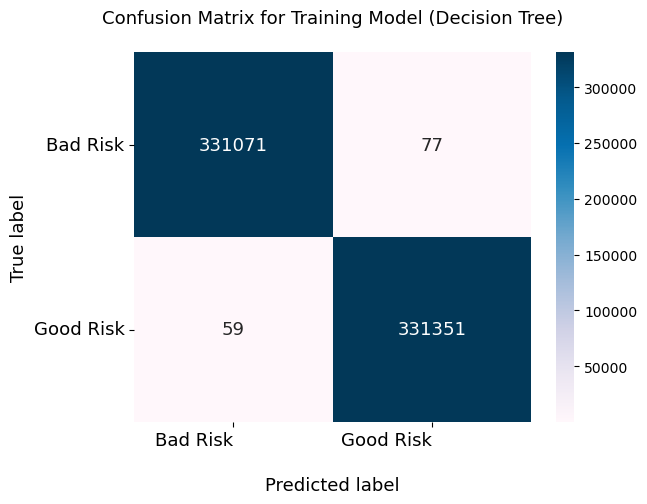

In [43]:
# predict data train
y_train_pred_dt = dt_model.predict(x_train)

# print classification report
print('Classification Report Training Model (Decision Tree):')
print(classification_report(y_train, y_train_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritma Decision Tree memiliki nilai akurasi yang sangat tinggi.


Berdasarkan **confusion matrix**, diketahui bahwa:
- Pengklasifikasi membuat total 662.558 prediksi. Tapi hanya 662.422 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 331.130 data dan **Good risk** 331.428 data. Kenyataannya, status risiko pada sampel memiliki 331.148 **Bad risk** dan 331.410 **Good risk**.
- Model Decision Tree mengklasifikasikan hampir 100% dari mereka dengan benar.

Classification Report Testing Model (Decision Tree):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     82951
           1       0.99      0.98      0.98     82689

    accuracy                           0.98    165640
   macro avg       0.98      0.98      0.98    165640
weighted avg       0.98      0.98      0.98    165640



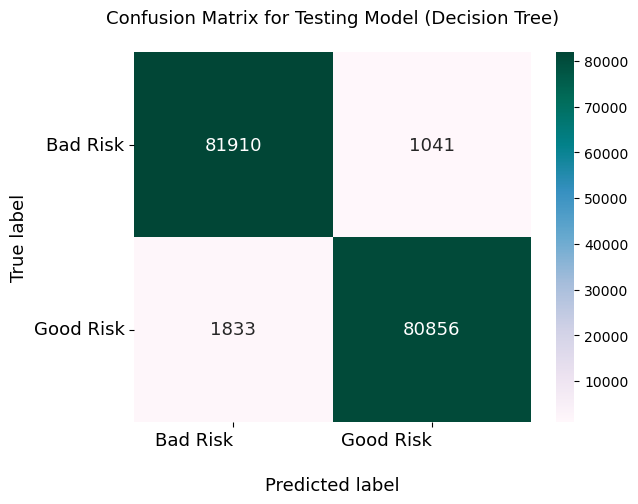

In [44]:
# predict data test
y_test_pred_dt = dt_model.predict(x_test)

# print classification report
print('Classification Report Testing Model (Decision Tree):')
print(classification_report(y_test, y_test_pred_dt))

# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Decision Tree)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pengujian algoritma random forest memiliki nilai akurasi yang sangat tinggi.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 165.640 prediksi. Tapi hanya 162.766 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 83.743 data dan **Good risk** 81.897 data. Kenyataannya, status risiko dalam sampel memiliki 82.951 **Bad risk** dan 82.689 **Good risk**.
- Model Decision Tree mengklasifikasikan 98% dari mereka dengan benar.

In [45]:
acc_dt_train=round(dt_model.score(x_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.98 %
Testing Accuracy: 98.26 %


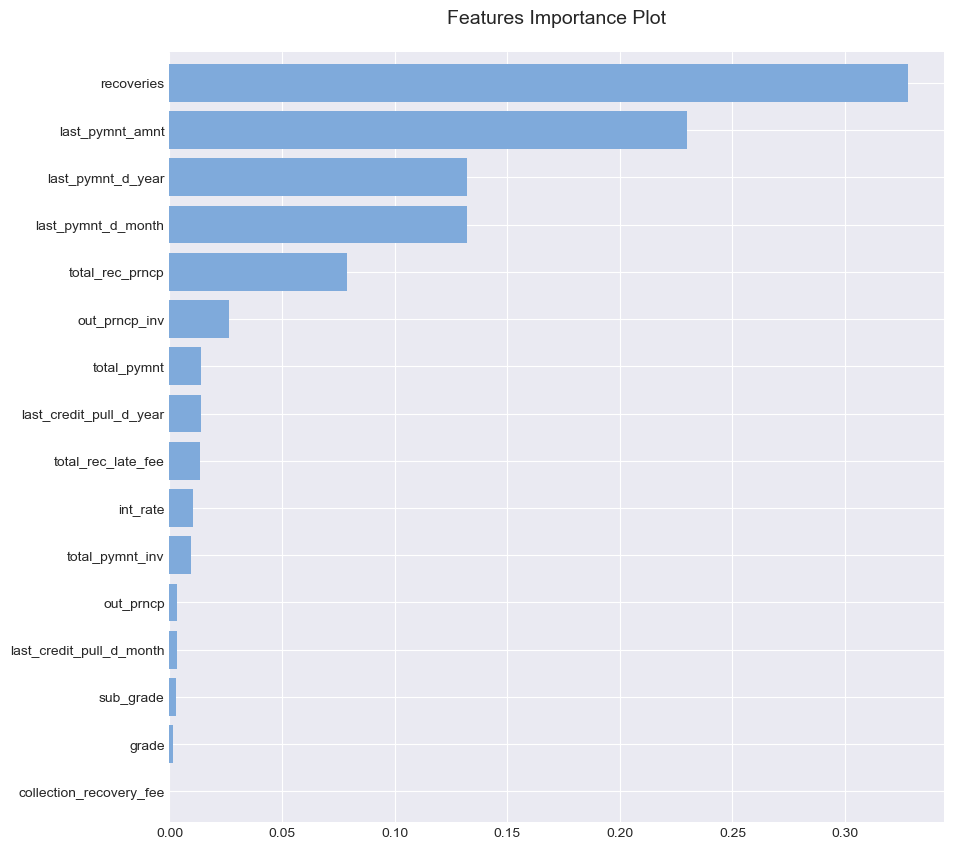

In [116]:
# important features
importances_dt = pd.Series(dt_model.feature_importances_, index=x.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_dt.plot(kind ='barh', color='#7faadb', width=0.8)
plt.title('Plot Kolom Terpenting\n', fontsize=14)
plt.show()

#fig.figure.tight_layout()
#fig.figure.savefig('top feature dt.png')

Plot di atas menegaskan bahwa lima fitur terpenting adalah
- `Recoveries` adalah bulan terakhir pembayaran diterima.
- `last_pymnt_amnt` adalah total jumlah pembayaran terakhir yang diterima.
- `last_pymnt_d_year` adalah tahun pembayaran terakhir diterima.
- `last_pymnt_d_month` adalah bulan terakhir pembayaran diterima.
- `total_rec_prncp` adalah total pokok yang diterima hingga saat ini.

### 2. Random Forest

In [46]:
# train the model
rf_model = RandomForestClassifier().fit(x_train, y_train)
print(rf_model)

RandomForestClassifier()


Classification Report Training Model (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    331148
           1       1.00      1.00      1.00    331410

    accuracy                           1.00    662558
   macro avg       1.00      1.00      1.00    662558
weighted avg       1.00      1.00      1.00    662558



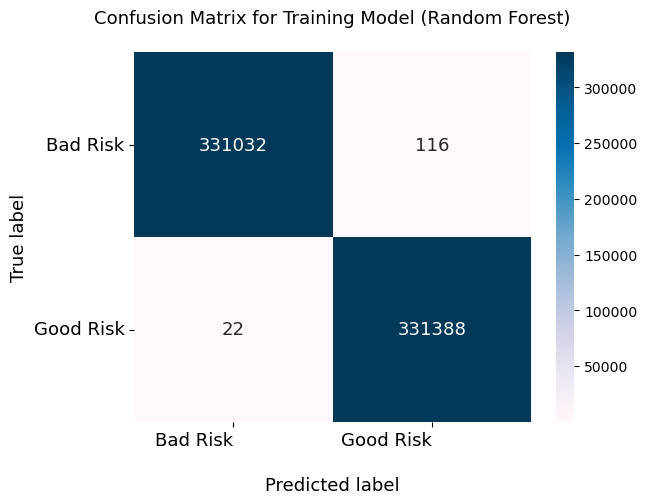

In [47]:
# predict data train
y_train_pred_rf = rf_model.predict(x_train)

# print classification report
print('Classification Report Training Model (Random Forest):')
print(classification_report(y_train, y_train_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritma Random Forest memiliki nilai akurasi yang sangat tinggi.


Berdasarkan **confusion matrix**, diketahui bahwa:
- Pengklasifikasi membuat total 662.558 prediksi. Tapi hanya 662.420 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 331.054 data dan **Good risk** 331.504 data. Kenyataannya, status risiko pada sampel memiliki 331.148 **Bad risk** dan 331.410 **Good risk**.
- Model Random Forest mengklasifikasikan hampir 100% dari mereka dengan benar.

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



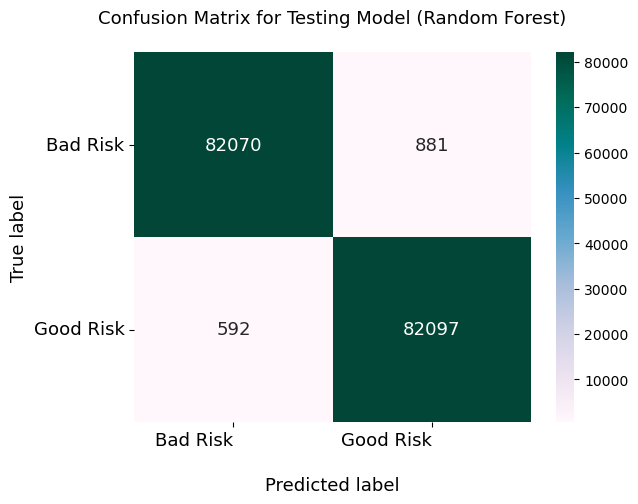

In [48]:
# predict data test
y_test_pred_rf = rf_model.predict(x_test)

# print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_test_pred_rf))

# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Random Forest)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritma Random Forest memiliki nilai akurasi yang sangat tinggi.


Berdasarkan **confusion matrix**, diketahui bahwa:
- Pengklasifikasi membuat total 165.640 prediksi. Tapi hanya 164.167 dari mereka yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 82.662 kali dan **Good risk** 82.978 kali. Kenyataannya, status risiko pada sampel memiliki 82.951 **Bad risk** dan 82.689 **Good risk**.
- Kelas **Bad risk** dan kelas **Good risk** keduanya merupakan kelas dengan klasifikasi terbaik. Model Random Forest mengklasifikasikan 99% dari mereka dengan benar.

In [62]:
acc_rf_train=round(rf_model.score(x_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Testing Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.98 %
Testing Accuracy: 99.11 %


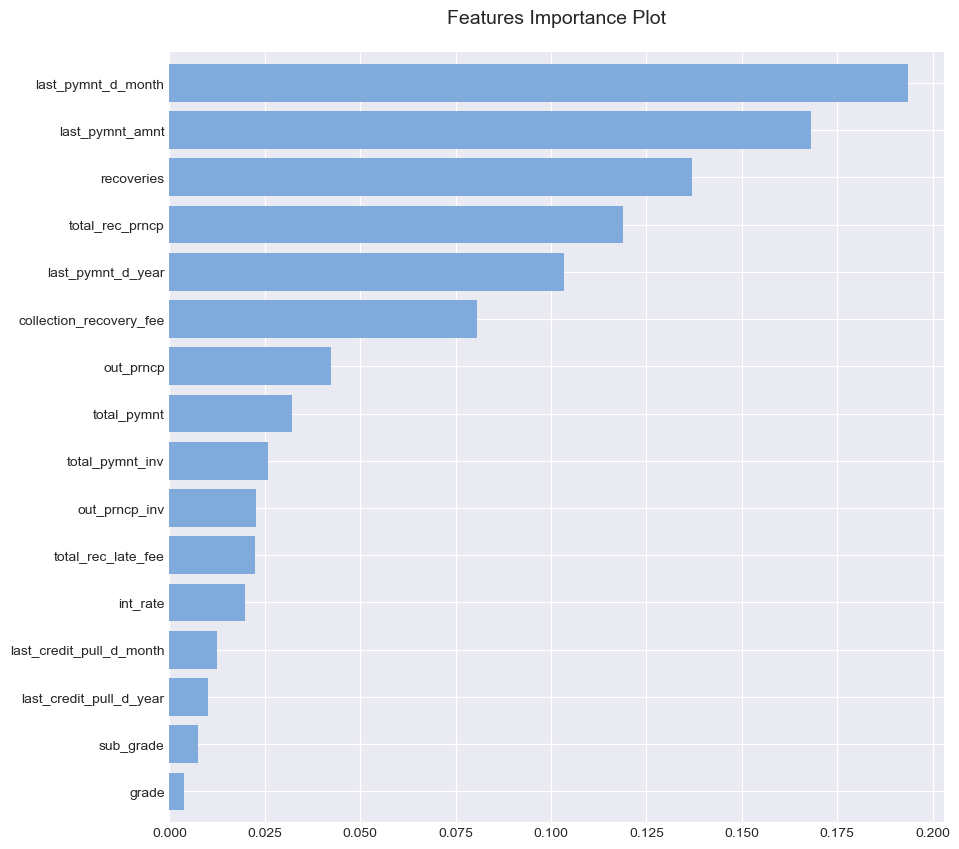

In [121]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=x.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color='#7faadb', width=0.8)
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

#fig.figure.tight_layout()
#fig.figure.savefig('top feature dt.png')

Plot di atas menegaskan bahwa lima fitur terpenting adalah
- `last_pymnt_d_month` adalah bulan terakhir pembayaran diterima.
- `last_pymnt_amnt` adalah total jumlah pembayaran terakhir yang diterima.
- `total_rec_prncp` adalah total pokok yang diterima hingga saat ini.
- `pemulihan` adalah pasca penagihan dari pemulihan bruto.
- `last_pymnt_d_year` adalah tahun pembayaran terakhir diterima.

### 3. Logistic Regression

In [50]:
# train the model
log_model = LogisticRegression().fit(x_train, y_train)
print(log_model)

LogisticRegression()


Classification Report Training Model (Logistic Regression):


              precision    recall  f1-score   support

           0       0.89      0.88      0.88    331148
           1       0.88      0.89      0.88    331410

    accuracy                           0.88    662558
   macro avg       0.88      0.88      0.88    662558
weighted avg       0.88      0.88      0.88    662558



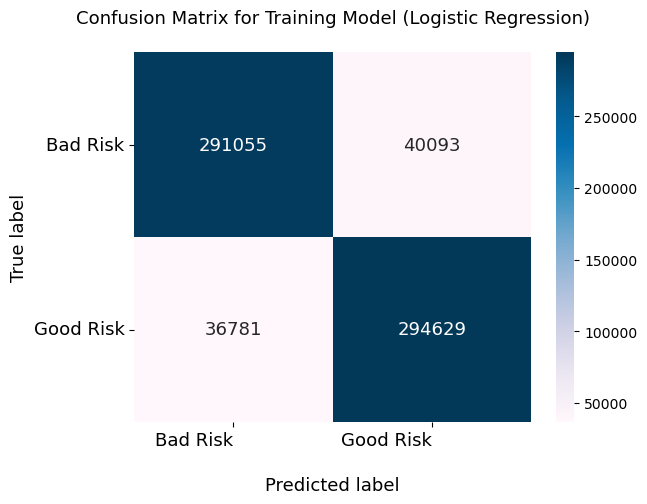

In [51]:
# predict data train
y_train_pred_log = log_model.predict(x_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritma Logistic Regression memiliki nilai akurasi yang tinggi.


Berdasarkan **confusion matrix**, diketahui bahwa:
- Pengklasifikasi membuat total 662.558 prediksi. Tapi hanya 585.684 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 327.836 data dan **Good risk** 334.722 data. Kenyataannya, status risiko pada sampel memiliki 331.148 **Bad risk** dan 331.410 **Good risk**.
- Kelas **Good risk** sedikit lebih baik daripada kelas **Bad risk**, model mengklasifikasikan 88% dengan benar.

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     82951
           1       0.88      0.88      0.88     82689

    accuracy                           0.88    165640
   macro avg       0.88      0.88      0.88    165640
weighted avg       0.88      0.88      0.88    165640



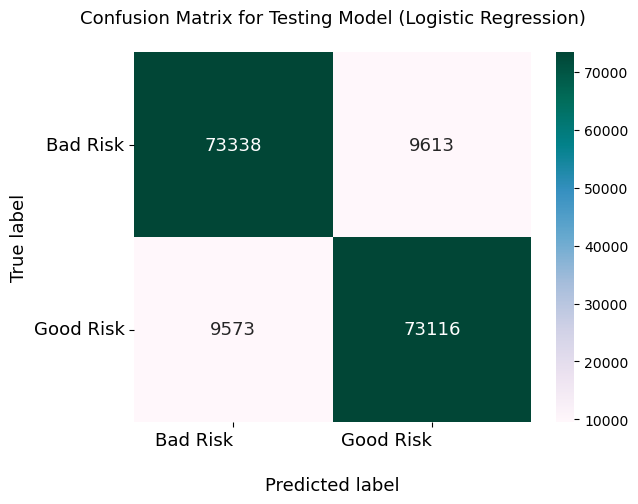

In [52]:
# predict data test
y_test_pred_log = log_model.predict(x_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Logistic Regression)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritma Logistic Regression memiliki nilai akurasi yang tinggi.


Berdasarkan **confusion matrix**, diketahui bahwa:
- Pengklasifikasi membuat total 165.640 prediksi. Tapi hanya 146.454 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 82.911 kali dan **Good risk** 82.729 kali. Kenyataannya, status risiko pada sampel memiliki 82.951 **Bad risk** dan 82.689 **Good risk**.
- Kelas **Good risk** sedikit lebih baik daripada kelas **Bad risk**, model mengklasifikasikan 88% dengan benar.

In [53]:
acc_log_train=round(log_model.score(x_train,y_train)*100,2)
acc_log_test=round(log_model.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 88.4 %
Test Accuracy: 88.42 %


### 6. MLP Classifier (Neural Network)

In [73]:
# train the model
mlp_model = MLPClassifier().fit(x_train, y_train)
(print(mlp_model))

MLPClassifier()


Classification Report Training Model (MLP Classifier):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    331148
           1       0.98      0.99      0.99    331410

    accuracy                           0.99    662558
   macro avg       0.99      0.99      0.99    662558
weighted avg       0.99      0.99      0.99    662558



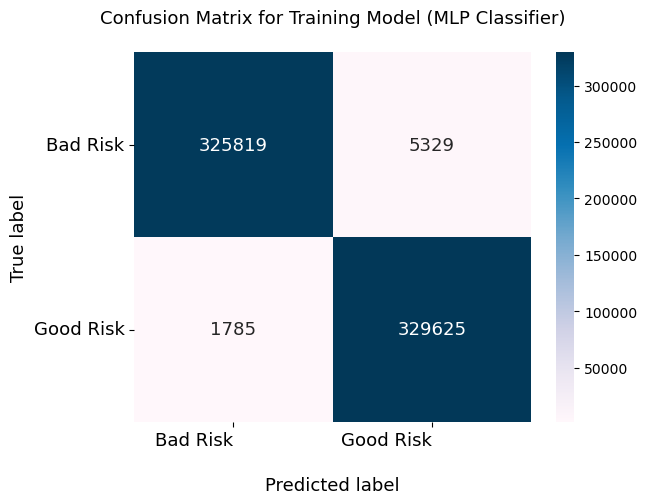

In [74]:
# predict data train
y_train_pred_mlp = mlp_model.predict(x_train)

# print classification report
print('Classification Report Training Model (MLP Classifier):')
print(classification_report(y_train, y_train_pred_mlp))

# form confusion matrix as a dataFrame
confusion_matrix_mlp = pd.DataFrame((confusion_matrix(y_train, y_train_pred_mlp)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_mlp, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (MLP Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **laporan klasifikasi**, model pelatihan algoritma Neural Network memiliki nilai akurasi sangat tinggi.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 662.558 prediksi. Namun hanya 655.444 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 327.604 data dan **Good risk** 334.954 data. Kenyataannya, status risiko dalam sampel memiliki 331.148 **Bad risk** dan 331.410 **Good risk**.
- Model Neural Network mengklasifikasikan 99% dari percobaan dengan benar.
- Lebih banyak kesalahan dibuat dengan memprediksi **Bad risk** sebagai **Good risk** dengan 5.329 data di Predicted Label.

Classification Report Testing Model (MLP Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



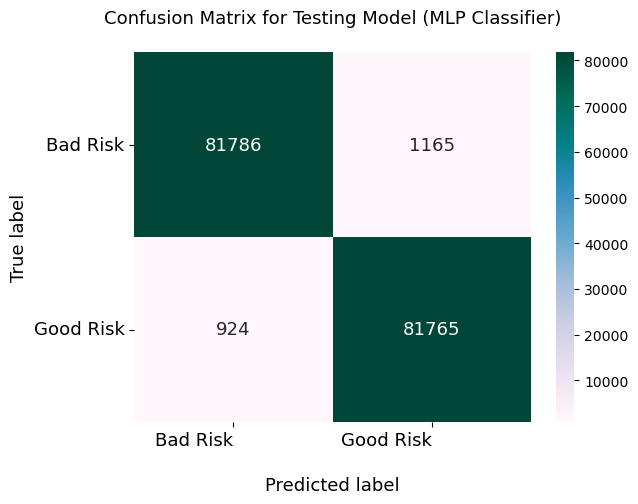

In [75]:
# predict data test
y_test_pred_mlp = mlp_model.predict(x_test)

# print classification report
print('Classification Report Testing Model (MLP Classifier):')
print(classification_report(y_test, y_test_pred_mlp))

# form confusion matrix as a daAtaFrame
confusion_matrix_mlp = pd.DataFrame((confusion_matrix(y_test, y_test_pred_mlp)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_mlp, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (MLP Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **laporan klasifikasi**, model pengujian algoritma neural network memiliki nilai akurasi sangat tinggi.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 165.640 prediksi. Namun hanya 163.551 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 82.710 data dan **Good risk** 82.930 data. Kenyataannya, status risiko dalam sampel memiliki 82.951 risiko buruk dan 82.689 risiko baik.
- Model jaringan saraf mengklasifikasikan 99% dari mereka dengan benar.
- Lebih banyak kesalahan dibuat dengan memprediksi **Bad risk** sebagai **Good risk** sebanyak 1.165 data di Predicted Label.

In [76]:
acc_mlp_train=round(mlp_model.score(x_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 98.93 %
Test Accuracy: 98.74 %


### 5. Naive Bayes

In [54]:
# train the model
gnb_model = GaussianNB().fit(x_train, y_train)
print(gnb_model)

GaussianNB()


Classification Report Training Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.51      0.67    331148
           1       0.67      0.99      0.80    331410

    accuracy                           0.75    662558
   macro avg       0.83      0.75      0.74    662558
weighted avg       0.83      0.75      0.74    662558



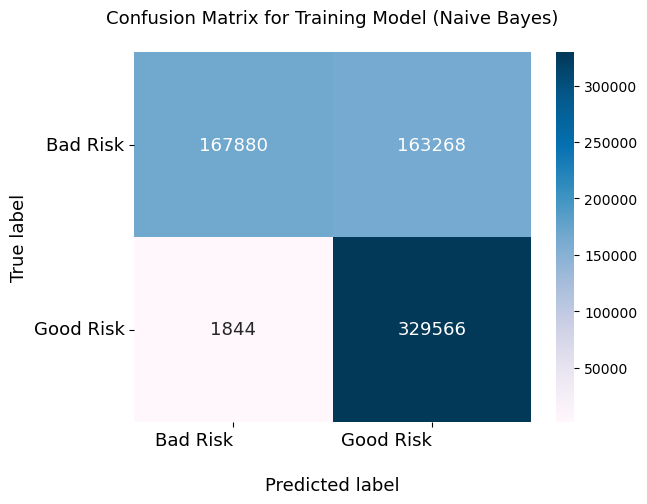

In [31]:
# predict data train
y_train_pred_gnb = gnb_model.predict(x_train)

# print classification report
print('Classification Report Training Model (Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Naive Bayes)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritma Naive Bayes memiliki nilai akurasi sedang.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 662.558 prediksi. Tapi hanya 497.446 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 169.724 data dan **Good risk** 492.832 data. Kenyataannya, status risiko dalam sampel memiliki 331.148 **Bad risk** dan 331.410 **Good risk**.
- Model Naive Bayes mengklasifikasikan 99% dari mereka dengan benar di Predicted label pada **Good risk**. Namun, model tersebut hanya dapat mengklasifikasikan dengan benar 50,7% di Predicted Label pada kelas **Bad risk**. Lebih banyak kesalahan dibuat dengan memprediksi **Bad risk** sebagai **Good risk** di Predicted label sebanyak 163.268 data.

Classification Report Testing Model (Naive Bayes):
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     82951
           1       0.67      1.00      0.80     82689

    accuracy                           0.75    165640
   macro avg       0.83      0.75      0.73    165640
weighted avg       0.83      0.75      0.73    165640



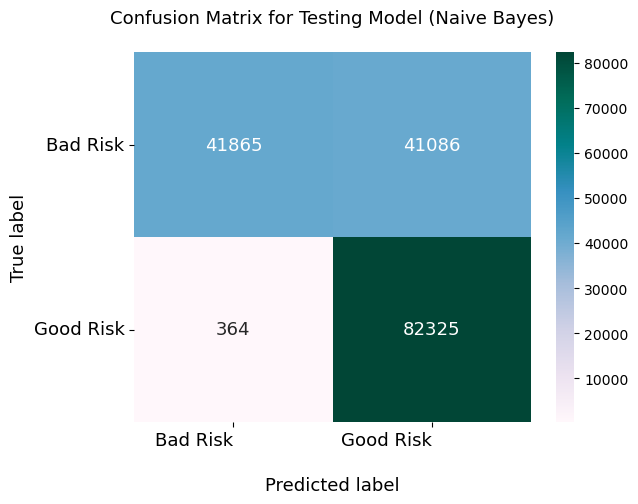

In [33]:
# predict data test
y_test_pred_gnb = gnb_model.predict(x_test)

# print classification report
print('Classification Report Testing Model (Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Naive Bayes)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pengujian algoritma Naive Bayes memiliki nilai akurasi sedang.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 165.640 prediksi. Tapi hanya 124.190 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 42.229 data dan **Good risk** 123.411 data. Kenyataannya, status risiko dalam sampel memiliki 82.951 **Bad risk** dan 82.689 **Good risk**.
- Model Naive Bayes mengklasifikasikan hampir 100%  dengan benar pada di Predicted Label pada **Good risk**. Namun, model tersebut hanya dapat mengklasifikasikan dengan benar 50,5% di Predicted Label pada **Bad risk**. Lebih banyak kesalahan dibuat dengan memprediksi **Bad risk** sebagai **Good risk** di Predicted Label sebanyak 41.086 data.

In [70]:
acc_gnb_train=round(gnb_model.score(x_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

Training Accuracy: 75.08 %
Test Accuracy: 74.98 %


### 4. K-Nearest Neighbors

In [65]:
# train the model
knn_model = KNeighborsClassifier().fit(x_train,y_train)
print(knn_model)

KNeighborsClassifier()


Classification Report Training Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    331148
           1       0.98      0.97      0.98    331410

    accuracy                           0.98    662558
   macro avg       0.98      0.98      0.98    662558
weighted avg       0.98      0.98      0.98    662558



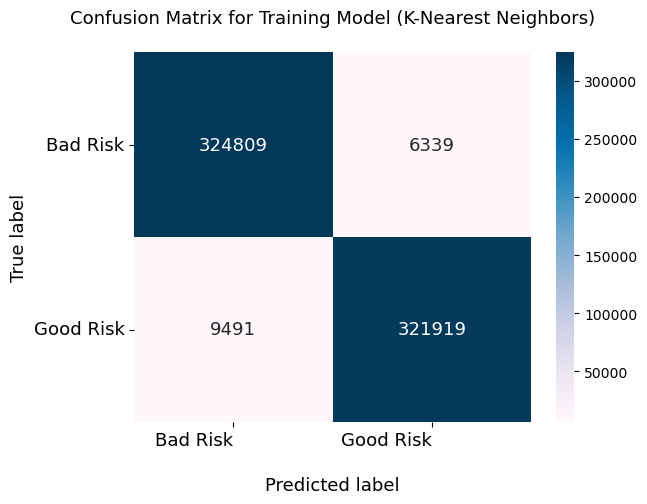

In [66]:
# predict data train
y_train_pred_knn = knn_model.predict(x_train)

# print classification report
print('Classification Report Training Model (K-Nearest Neighbors):')
print(classification_report(y_train, y_train_pred_knn))

# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (K-Nearest Neighbors)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritma k-nearest neighbor memiliki nilai akurasi yang sangat tinggi.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 662.558 prediksi. Tapi hanya 646.728 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan risiko buruk 334.300 data dan risiko baik 328.258 data. Kenyataannya, status risiko dalam sampel memiliki 331.148 **Bad risk** dan 331.410 **Bad risk**.
- Kelas **Good risk** sedikit lebih baik daripada kelas **Bad risk** di Prediction Label, model k-nearest neighbor mengklasifikasikan 98% dengan benar.

Classification Report Testing Model (K-Nearest Neighbors):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     82951
           1       0.97      0.96      0.97     82689

    accuracy                           0.97    165640
   macro avg       0.97      0.97      0.97    165640
weighted avg       0.97      0.97      0.97    165640



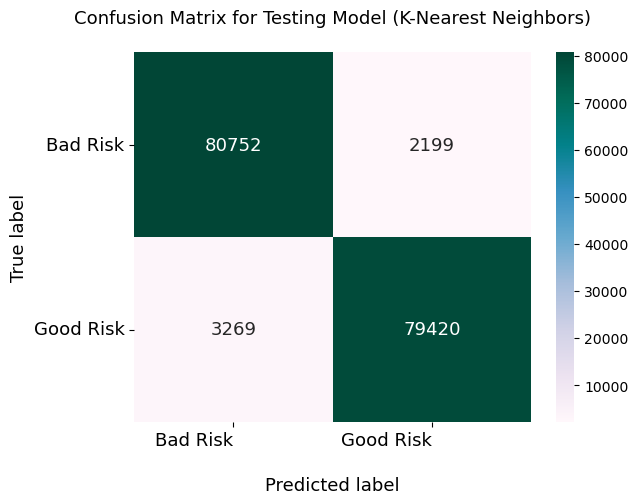

In [67]:
# predict data test
y_test_pred_knn = knn_model.predict(x_test)

# print classification report
print('Classification Report Testing Model (K-Nearest Neighbors):')
print(classification_report(y_test, y_test_pred_knn))

# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (K-Nearest Neighbors)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pengujian algoritma k-nearest neighbor memiliki nilai akurasi yang sangat tinggi

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 165.640 prediksi. Tapi hanya 160.172 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 84.021 data dan **Bad risk** 81.619 data. Kenyataannya, status risiko dalam sampel memiliki 82.951 **Bad risk** dan 82.689 **Good risk**.
- Kelas **Good risk** sedikit lebih baik daripada kelas **Bad risk**, model k-nearest neighbor mengklasifikasikan 97% dengan benar.

In [68]:
acc_knn_train=round(knn_model.score(x_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_knn_train))
print("Test Accuracy: {} %".format(acc_knn_test))

Training Accuracy: 97.61 %
Test Accuracy: 96.7 %


### 7. XGBoost

In [33]:
# train the model
xgb_model = XGBClassifier().fit(x_train, y_train)
print(xgb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Classification Report Training Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    331148
           1       0.99      1.00      0.99    331410

    accuracy                           0.99    662558
   macro avg       0.99      0.99      0.99    662558
weighted avg       0.99      0.99      0.99    662558



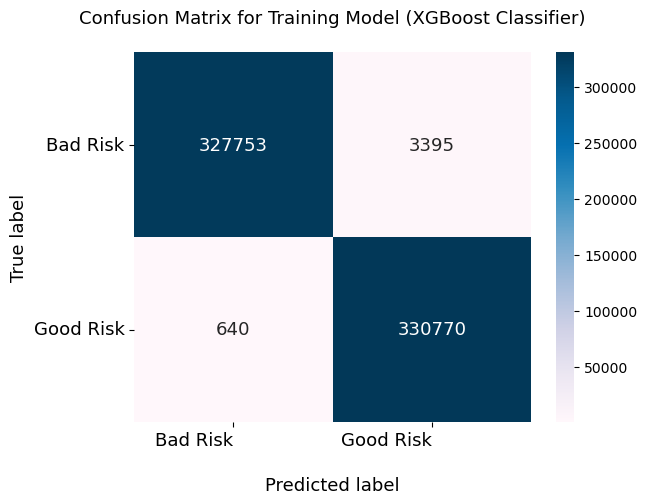

In [34]:
# predict data train
y_train_pred_xgb = xgb_model.predict(x_train)

# print classification report
print('Classification Report Training Model (XGBoost Classifier):')
print(classification_report(y_train, y_train_pred_xgb))

# form confusion matrix as a dataFrame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_xgb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (XGBoost Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritme XGBoost memiliki nilai akurasi yang sangat tinggi.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 662.558 prediksi. Namun hanya 658.523 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 328.393 data dan **Good risk** 334.165 data. Kenyataannya, status risiko dalam sampel memiliki 331.148 **Bad risk** dan 331.410 **Good risk**.
- Kelas **Bad risk** sedikit lebih baik daripada kelas **Good risk**, model XGBoost mengklasifikasikan 99% dengan benar di Predicted Label.
- Lebih banyak kesalahan dibuat dengan memprediksi **Bad risk** di True Label sebagai **Good risk** di Predicted Label sebanyak 3.395 data.

Classification Report Testing Model (XGBoost Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82951
           1       0.99      0.99      0.99     82689

    accuracy                           0.99    165640
   macro avg       0.99      0.99      0.99    165640
weighted avg       0.99      0.99      0.99    165640



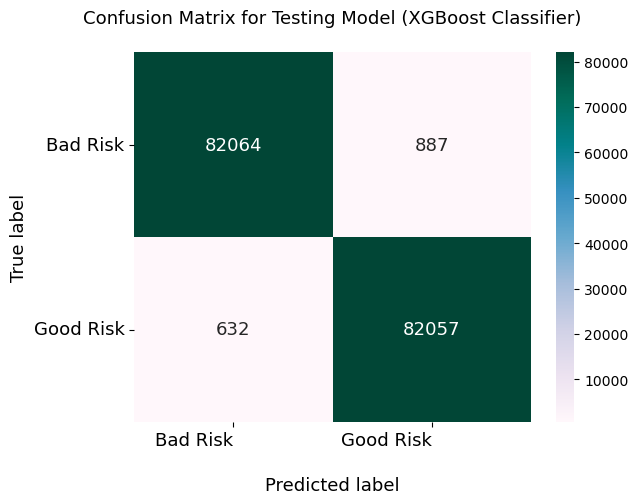

In [35]:
# predict data test
y_test_pred_xgb = xgb_model.predict(x_test)

# print classification report
print('Classification Report Testing Model (XGBoost Classifier):')
print(classification_report(y_test, y_test_pred_xgb))

# form confusion matrix as a dataFrame
confusion_matrix_xgb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_xgb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_xgb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (XGBoost Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pengujian algoritma XGBoost memiliki nilai akurasi yang sangat tinggi.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 165.640 prediksi. Namun hanya 164.121 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 82.696 data dan **Good risk** 82.944 data. Kenyataannya, status risiko dalam sampel memiliki 82.951 **Bad risk** dan 82.689 **Good risk**.
- Model XGBoost mengklasifikasikan 99% dengan benar.

In [36]:
acc_xgb_train=round(xgb_model.score(x_train,y_train)*100,2)
acc_xgb_test=round(xgb_model.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

Training Accuracy: 99.39 %
Test Accuracy: 99.08 %


### 8. Gradient Boosting Classifier

In [37]:
# train the model
gb_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gb_model)

GradientBoostingClassifier()


Classification Report Training Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    331148
           1       0.98      0.97      0.98    331410

    accuracy                           0.98    662558
   macro avg       0.98      0.98      0.98    662558
weighted avg       0.98      0.98      0.98    662558



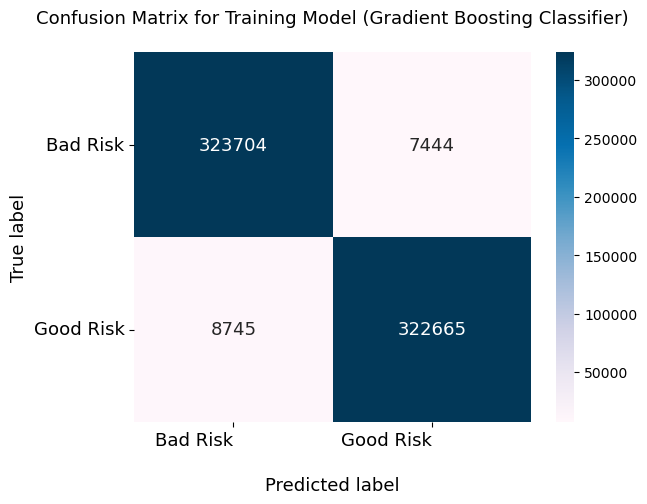

In [38]:
# predict data train
y_train_pred_gb = gb_model.predict(x_train)

# print classification report
print('Classification Report Training Model (Gradient Boosting Classifier):')
print(classification_report(y_train, y_train_pred_gb))

# form confusion matrix as a dataFrame
confusion_matrix_gb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Training Model (Gradient Boosting Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pelatihan algoritma gradient boosting memiliki nilai akurasi yang sangat tinggi.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 662.558 prediksi. Namun, hanya 646.369 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 332.449 data dan **Good risk** 330.109 data. Kenyataannya, status risiko dalam sampel memiliki 331.148 **Bad risk** dan 331.410 **Good risk**.
- Kelas **Good risk** sedikit lebih baik daripada kelas **Bad risk** di Predicted Label, model peningkatan gradien mengklasifikasikan 98% dengan benar.

Classification Report Testing Model (Gradient Boosting Classifier):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     82951
           1       0.98      0.97      0.98     82689

    accuracy                           0.98    165640
   macro avg       0.98      0.98      0.98    165640
weighted avg       0.98      0.98      0.98    165640



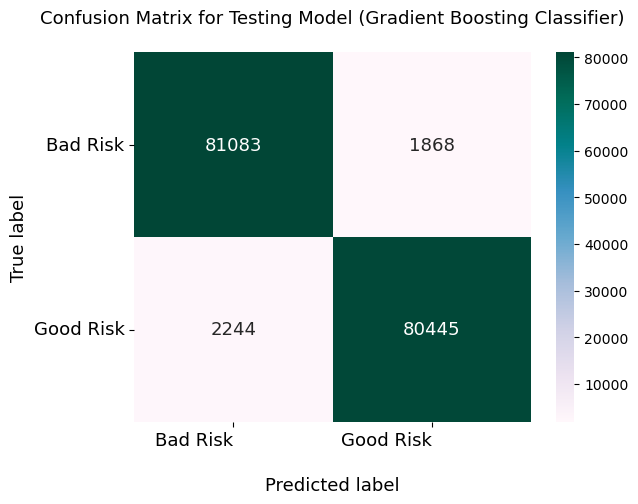

In [39]:
# predict data test
y_test_pred_gb = gb_model.predict(x_test)

# print classification report
print('Classification Report Testing Model (Gradient Boosting Classifier):')
print(classification_report(y_test, y_test_pred_gb))

# form confusion matrix as a dataFrame
confusion_matrix_gb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gb)), ('Bad Risk', 'Good Risk'), ('Bad Risk', 'Good Risk'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gb, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

plt.title('Confusion Matrix for Testing Model (Gradient Boosting Classifier)\n', fontsize=13, color='black')
plt.ylabel('True label', fontsize=13)
plt.xlabel('\nPredicted label', fontsize=13)
plt.show()

Berdasarkan hasil **Classification Report**, model pengujian algoritma gradient boosting memiliki nilai akurasi yang sangat tinggi.

Berdasarkan **confusion matrix**, diamati bahwa:
- Pengklasifikasi membuat total 165.640 prediksi. Tapi hanya 161.528 yang diprediksi dengan benar.
- Pengklasifikasi memperkirakan **Bad risk** 83.327 data dan **Good risk** 82.313 data. Kenyataannya, status risiko dalam sampel memiliki 82.951 **Bad risk** dan 82.689 **Good risk**.
- Kelas **Good risk** sedikit lebih baik daripada kelas **Bad risk** di Predicted Label untuk memprediksi, model peningkatan gradien mengklasifikasikan 98% dengan benar.

In [40]:
acc_gb_train=round(gb_model.score(x_train,y_train)*100,2)
acc_gb_test=round(gb_model.score(x_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gb_train))
print("Test Accuracy: {} %".format(acc_gb_test))

Training Accuracy: 97.56 %
Test Accuracy: 97.52 %


# Model Comparision

In [77]:
results = pd.DataFrame([["Decision Tree", acc_dt_train, acc_dt_test],["Random Forest", acc_rf_train, acc_rf_test], 
                        ["Logistic Regression", acc_log_train, acc_log_test], ["K-Nearest Neighbor", acc_knn_train, acc_knn_test],
                       ["Naive Bayes", acc_gnb_train, acc_gnb_test], ["MLP Classifier", acc_mlp_train, acc_mlp_test],
                        ["XGBoost  Classifier", acc_xgb_train, acc_xgb_test], ["Gradient Boosting Classifier", acc_gb_train, acc_gb_test]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

,Models,Training Accuracy Score,Testing Accuracy Score
0,Decision Tree,99.980000,99.110000
1,Random Forest,99.980000,99.110000
6,XGBoost Classifier,99.390000,99.080000
5,MLP Classifier,98.930000,98.740000
3,K-Nearest Neighbor,97.610000,96.700000
7,Gradient Boosting Classifier,97.560000,97.520000
2,Logistic Regression,88.400000,88.420000
4,Naive Bayes,75.080000,74.980000


1. Disimpulkan bahwa model **random forest** adalah model terbaik untuk memprediksi status risiko pinjaman pemohon.
     - Dibandingkan dengan model Decision Tree, yang memiliki nilai akurasi tinggi yang sama pada set pelatihan. Perbedaan akurasi antara training dan test pada model Random Forest (0,87%) lebih kecil daripada model Decision Tree (1,72%).
     - Meskipun, pengklasifikasi XGBoost juga memiliki nilai akurasi yang sangat tinggi, dan perbedaannya lebih kecil daripada model Random Forest. Model Random Forest juga berkinerja lebih baik pada perbedaan akurasi training pada testing. Itu berarti model Random Forest memiliki generalisasi yang lebih baik daripada model pengklasifikasi XGBoost.
    
2. Fitur yang paling penting dalam menentukan apakah pemohon kemungkinan besar tidak melunasi pinjamannya adalah **last payment month**, **last payment amount**, **total principal received**, **recovery value**, dan **last payment year**. Perusahaan perlu memantau indikator-indikator tersebut untuk mengurangi risiko kerugian.
     - Ke depan, jika ada pemohon dengan indikator tersebut, maka perusahaan dapat mengambil tindakan seperti menolak pinjamannya, mengurangi jumlah pinjaman, atau meminjamkan dengan tingkat bunga yang lebih tinggi untuk menghindari dan mengurangi total kerugian yang didapat perusahaan .